# NBA Prospect Data Analyis
Cade Phillips

The NBA is currently in an offensive driven era, and when looking at recent and upcoming lottery drafts, the goal of many NBA scouts is to find a positionally fluid, big-scoring, superstar who can be impactful in many different statistical boxes. This can be hard to predict however, and in recent draft classes, there are very few lotteries where the best regarded player today was selected with the number one overall pick. This data analysis research paper attempts to use the statistics that recent lottery draft classes, or top 14 picks in any given draft, have recorded, stretching back to 2011. We then will use this information to make predictions of how the different statistics of each player from the draft class of 2021 changes throughout their NBA careers. The purpose of this statistical analysis is to attempt to find patterns in draftees with the goal being to model the potential futures of the youngest class of NBA players and to improve the research that goes into drafting the league’s prospects. This is done using statistical averages from the draft classes 2011-2020, as well as exploring the use of neural networks and machine learning algorithms to discover what statistical patterns we can look for in upcoming NBA draftees.

## Establishing Datasets
This sections pulls from the playerstats folder and gets the data structured in a way where our analysis and machine learning tools can use it. This is also where we create our ranking system.

In [697]:
%matplotlib inline
import pandas as pd
from plotnine import *
import tensorflow as tf
import keras as  k
import numpy as np
np.set_printoptions(precision=3, suppress=True)
from tensorflow.keras import layers

In [698]:
df2011college = pd.read_csv("playerstats/2011collegestats.csv")
df2012college = pd.read_csv("playerstats/2012collegestats.csv")
df2013college = pd.read_csv("playerstats/2013collegestats.csv")
df2014college = pd.read_csv("playerstats/2014collegestats.csv")
df2015 = pd.read_csv("playerstats/2015playerstats.csv")
df2015nba = df2015[["Pk","Tm","Player","College", "Yrs","MP.1","PTS.1", "TRB.1","AST.1"]]
df2015nba.drop(df2015nba.index[14:],0,inplace=True)
df2015nba.pop("Yrs")
df2016 = pd.read_csv("playerstats/2016playerstats.csv")
df2016nba = df2016[["Pk","Tm","Player","College", "Yrs","MP.1","PTS.1", "TRB.1","AST.1"]]
df2016nba.drop(df2016nba.index[14:],0,inplace=True)
df2017 = pd.read_csv("playerstats/2017playerstats.csv")
df2017nba = df2017[["Pk","Tm","Player","College", "Yrs","MP.1","PTS.1", "TRB.1","AST.1"]]
df2017nba.drop(df2017nba.index[14:],0,inplace=True)
df2018 = pd.read_csv("playerstats/2018playerstats.csv")
df2018nba = df2018[["Pk","Tm","Player","College", "Yrs","MP.1","PTS.1", "TRB.1","AST.1"]]
df2018nba.drop(df2018nba.index[14:],0,inplace=True)
df2019 = pd.read_csv("playerstats/2019playerstats.csv")
df2019nba = df2019[["Pk","Tm","Player","College", "Yrs","MP.1","PTS.1", "TRB.1","AST.1"]]
df2019nba.drop(df2019nba.index[14:],0,inplace=True)
df2020 = pd.read_csv("playerstats/2020playerstats.csv")
df2020nba = df2020[["Pk","Tm","Player","College", "Yrs","MP.1","PTS.1", "TRB.1","AST.1"]]
df2020nba.drop(df2020nba.index[14:],0,inplace=True)
df2020nba.pop("Yrs")
df2021 = pd.read_csv("playerstats/2021playerstats.csv")
df2021.insert(1, "Pk", [1, 2, 3, 4,5,6,7,8,9,10,11,12,13,14,15], True)
df2021.insert(2,"Tm",["DET","HOU","CLE","TOR","ORL","OKC","GSW","ORL","SAC","NOL","CHO","SAS","IND","GSW","WAS"], True)
df2021college = df2021[["Pk","Tm","Player","College","MP.1","PTS.1", "TRB.1","AST.1"]]
df2021college.drop(df2021college.index[14:],0,inplace=True)
df2015college = pd.read_csv("playerstats/2015collegestats.csv")
df2015college.drop(df2015college.index[14:],0,inplace=True)
df2016college = pd.read_csv("playerstats/2016collegestats.csv")
df2016college.drop(df2016college.index[14:],0,inplace=True)
df2017college = pd.read_csv("playerstats/2017collegestats.csv")
df2017college.drop(df2017college.index[14:],0,inplace=True)
df2018college = pd.read_csv("playerstats/2018collegestats.csv")
df2018college.drop(df2018college.index[14:],0,inplace=True)
df2019college = pd.read_csv("playerstats/2019collegestats.csv")
df2019college.drop(df2019college.index[14:],0,inplace=True)
df2020college = pd.read_csv("playerstats/2020collegestats.csv")
df2020college.drop(df2020college.index[14:],0,inplace=True)
df2015college.insert(4, "POS", ["C","G","C","F","F","F","G","F","C","F","C","F","G","G"], True)
df2015nba.insert(4, "POS", ["C","G","C","F","F","F","G","F","C","F","C","F","G","G"], True)
df2016college.insert(4, "POS", ["G","F","G","F","G","G","G","F","C","F","C","F","C","G"], True)
df2016nba.insert(4, "POS", ["G","F","G","F","G","G","G","F","C","F","C","F","C","G"], True)
df2017college.insert(4, "POS", ["G","G","F","F","G","F","F","G","G","C","G","G","G","C"], True)
df2017nba.insert(4, "POS", ["G","G","F","F","G","F","F","G","G","C","G","G","G","C"], True)
df2018college.insert(4, "POS", ["C","F","G","F","G","C","C","G","F","F","G","F","G","F"], True)
df2018nba.insert(4, "POS", ["C","F","G","F","G","C","C","G","F","F","G","F","G","F"], True)
df2019college.insert(4, "POS", ["F","G","G","F","G","G","G","C","F","F","F","F","G","G"], True)
df2019nba.insert(4, "POS", ["F","G","G","F","G","G","G","C","F","F","F","F","G","G"], True)
df2020college.insert(4, "POS", ["G","C","G","F","F","F","G","F","F","C","G","G","G","F"], True)
df2020nba.insert(4, "POS", ["G","C","G","F","F","F","G","F","F","C","G","G","G","F"], True)
df2021college.insert(4, "POS", ["G","G","C","F","G","G","F","F","G","F","G","G","G","G"], True)

C:\Users\capta\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [699]:
yr1 = pd.read_csv("playerstats/yr1playerstats.csv")
frames = [df2020nba, yr1]
dfyr1 = pd.concat(frames)
dfyr1.reset_index(drop=True, inplace=True)
yr2 = pd.read_csv("playerstats/yr2playerstats.csv")
frames = [df2019nba, yr2]
dfyr2 = pd.concat(frames)
dfyr2.reset_index(drop=True, inplace=True)
yr3 = pd.read_csv("playerstats/yr3playerstats.csv")
frames = [df2018nba, yr3]
dfyr3 = pd.concat(frames)
dfyr3.reset_index(drop=True, inplace=True)
yr4 = pd.read_csv("playerstats/yr4playerstats.csv")
frames = [df2017nba, yr4]
dfyr4 = pd.concat(frames)
dfyr4.reset_index(drop=True, inplace=True)
yr5 = pd.read_csv("playerstats/yr5playerstats.csv")
frames = [df2016nba, yr5]
dfyr5 = pd.concat(frames)
dfyr5.reset_index(drop=True, inplace=True)
yr6 = pd.read_csv("playerstats/yr6playerstats.csv")
frames = [df2015nba, yr6]
dfyr6 = pd.concat(frames)
dfyr6.reset_index(drop=True, inplace=True)

In [700]:
frames = [df2020college, df2019college, df2018college, df2017college, df2016college, df2015college, df2014college, df2013college, df2012college,df2011college]
dfcollegestats = pd.concat(frames)
dfcollegestats.reset_index(drop=True, inplace=True)

In [701]:
def Average(lst):
    return sum(lst) / len(lst)

In [702]:
def nbarank(x,y, dfyr): 
    ranklist = []
    for i in range(x,y):
        nbadf = dfyr.loc[i]
        newlist = []
        if nbadf["POS"] == "G":
            playervalue = ranking(4,1,3,nbadf)
        if nbadf["POS"] == "F":
            playervalue = ranking(3,2,2,nbadf)
        if nbadf["POS"] == "C":
            playervalue = ranking(2,4,1,nbadf)
        ranklist.append(playervalue)
    return ranklist

In [703]:
def ranking(ptvalue, rebvalue, astvalue, nbadf):
    newlist = []
    if nbadf["PTS.1"] >= 20.2:
        for j in range(ptvalue):
            newlist.append(10)
    elif 20.1 >= nbadf["PTS.1"] >= 16.2:
        for j in range(ptvalue):
            newlist.append(9)
    elif 16.1 >= nbadf["PTS.1"] >= 13.8:
        for j in range(ptvalue):
            newlist.append(8)
    elif 13.7 >= nbadf["PTS.1"] >= 11.9:
        for j in range(ptvalue):
            newlist.append(7)
    elif 11.8 >= nbadf["PTS.1"] >= 9.6:
        for j in range(ptvalue):
            newlist.append(6)
    elif 9.5 >= nbadf["PTS.1"] >= 7.8:
        for j in range(ptvalue):
            newlist.append(5)
    elif 7.7 >= nbadf["PTS.1"] >= 6.7:
        for j in range(ptvalue):
            newlist.append(4)
    elif 6.6 >= nbadf["PTS.1"] >= 5.4:
        for j in range(ptvalue):
            newlist.append(3)
    elif 5.3 >= nbadf["PTS.1"] >= 4.0:
        for j in range(ptvalue):
            newlist.append(2)
    elif 3.9 >= nbadf["PTS.1"] >= 0.0:
        for j in range(ptvalue):
            newlist.append(1)
    if nbadf["TRB.1"] >= 8.7:
        for j in range(rebvalue):
            newlist.append(10)
    elif 8.6 >= nbadf["TRB.1"] >= 6.4:
        for j in range(rebvalue):
            newlist.append(9)
    elif 6.3 >= nbadf["TRB.1"] >= 5.4:
        for j in range(rebvalue):
            newlist.append(8)
    elif 5.3 >= nbadf["TRB.1"] >= 4.6:
        for j in range(rebvalue):
            newlist.append(7)
    elif 4.5 >= nbadf["TRB.1"] >= 4.0:
        for j in range(rebvalue):
            newlist.append(6)
    elif 3.9 >= nbadf["TRB.1"] >= 3.4:
        for j in range(rebvalue):
            newlist.append(5)
    elif 3.3 >= nbadf["TRB.1"] >= 2.9:
        for j in range(rebvalue):
            newlist.append(4)
    elif 2.8 >= nbadf["TRB.1"] >= 2.5:
        for j in range(rebvalue):
            newlist.append(3)
    elif 2.4 >= nbadf["TRB.1"] >= 2.0:
        for j in range(rebvalue):
            newlist.append(2)
    elif 1.9 >= nbadf["TRB.1"] >= 0.0:
        for j in range(rebvalue):
            newlist.append(1)
    if nbadf["AST.1"] >= 5.2:
        for j in range(astvalue):
            newlist.append(10)
    elif 5.1 >= nbadf["AST.1"] >= 3.8:
        for j in range(astvalue):
            newlist.append(9)
    elif 3.7 >= nbadf["AST.1"] >= 2.8:
        for j in range(astvalue):
            newlist.append(8)
    elif 2.7 >= nbadf["AST.1"] >= 2.2:
        for j in range(astvalue):
            newlist.append(7)
    elif 2.1 >= nbadf["AST.1"] >= 1.7:
        for j in range(astvalue):
            newlist.append(6)
    elif 1.6 >= nbadf["AST.1"] >= 1.5:
        for j in range(astvalue):
            newlist.append(5)
    elif 1.4 >= nbadf["AST.1"] >= 1.2:
        for j in range(astvalue):
            newlist.append(4)
    elif 1.1 >= nbadf["AST.1"] >= 1.0:
        for j in range(astvalue):
            newlist.append(3)
    elif 0.9 >= nbadf["AST.1"] >= 0.7:
        for j in range(astvalue):
            newlist.append(2)
    elif 0.6 >= nbadf["AST.1"] >= 0.0:
        for j in range(astvalue):
            newlist.append(1)
    average = Average(newlist)
    return (round(average, 0))

In [704]:
dfyr1.insert(9, "RANK", nbarank(0,70,dfyr1), True)
dfyr2.insert(10, "RANK", nbarank(0,70,dfyr2), True)
dfyr3.insert(10, "RANK", nbarank(0,70,dfyr3), True)
dfyr4.insert(10, "RANK", nbarank(0,70,dfyr4), True)
dfyr5.insert(10, "RANK", nbarank(0,70,dfyr5), True)
dfyr6.insert(9, "RANK", nbarank(0,70,dfyr6), True)
df2021college.insert(9, "COL RANK", nbarank(0,14,df2021college), True)
dfcollegestats.insert(9, "RANK", nbarank(0,140,dfcollegestats), True)

In [705]:
pd.set_option('display.max_rows', 210)
rankyrs = pd.read_csv("playerstats/rankingyears.csv")
rankyrsfin = rankyrs[["Player","Yrs","MP.1","PTS.1", "TRB.1","AST.1","POS"]]
rankyrsfin.insert(7, "RANK", nbarank(0,210,rankyrsfin), True)
dfrank = rankyrsfin.loc[rankyrsfin["Yrs"]==1]
dfrank = dfrank.reset_index()
dfrank2 = rankyrsfin.loc[rankyrsfin["Yrs"]==2]
dfrank2 = dfrank2.reset_index()
dfrank3 = rankyrsfin.loc[rankyrsfin["Yrs"]==3]
dfrank3 = dfrank3.reset_index()
dfrank4 = rankyrsfin.loc[rankyrsfin["Yrs"]==4]
dfrank4 = dfrank4.reset_index()
dfrank5 = rankyrsfin.loc[rankyrsfin["Yrs"]==5]
dfrank5 = dfrank5.reset_index()

In [706]:
dfyr2["YR 1 RANK"] = (list(dfyr1["RANK"])[14:] + list(dfrank["RANK"])[56:])
dfyr3["YR 1 RANK"] = (list(dfyr2["YR 1 RANK"])[14:] + list(dfrank["RANK"])[42:56])
dfyr3["YR 2 RANK"] = (list(dfyr2["RANK"])[14:]+ list(dfrank2["RANK"])[42:])
dfyr4["YR 1 RANK"] = (list(dfyr3["YR 1 RANK"])[14:] + list(dfrank["RANK"])[28:42])
dfyr4["YR 2 RANK"] = (list(dfyr3["YR 2 RANK"])[14:]+ list(dfrank2["RANK"])[28:42])
dfyr4["YR 3 RANK"] = (list(dfyr3["RANK"])[14:]+ list(dfrank3["RANK"])[28:])
dfyr5["YR 1 RANK"] = (list(dfyr4["YR 1 RANK"])[14:] + list(dfrank["RANK"])[14:28])
dfyr5["YR 2 RANK"] = (list(dfyr4["YR 2 RANK"])[14:]+ list(dfrank2["RANK"])[14:28])
dfyr5["YR 3 RANK"] = (list(dfyr4["YR 3 RANK"])[14:]+ list(dfrank3["RANK"])[14:28])
dfyr5["YR 4 RANK"] = (list(dfyr4["RANK"])[14:]+ list(dfrank4["RANK"])[14:])
dfyr6["YR 1 RANK"] = (list(dfyr5["YR 1 RANK"])[14:] + list(dfrank["RANK"])[0:14])
dfyr6["YR 2 RANK"] = (list(dfyr5["YR 2 RANK"])[14:]+ list(dfrank2["RANK"])[0:14])
dfyr6["YR 3 RANK"] = (list(dfyr5["YR 3 RANK"])[14:]+ list(dfrank3["RANK"])[0:14])
dfyr6["YR 4 RANK"] = (list(dfyr5["YR 4 RANK"])[14:]+ list(dfrank4["RANK"])[0:14])
dfyr6["YR 5 RANK"] = (list(dfyr5["RANK"])[14:]+ list(dfrank5["RANK"]))
dfyr2 = dfyr2[['Pk', 'Tm', 'Player', 'College', "POS", "MP.1", "PTS.1", "TRB.1", "AST.1", "YR 1 RANK", "RANK"]]
dfyr3 = dfyr3[['Pk', 'Tm', 'Player', 'College', "POS", "MP.1", "PTS.1", "TRB.1", "AST.1", "YR 1 RANK","YR 2 RANK", "RANK"]]
dfyr4 = dfyr4[['Pk', 'Tm', 'Player', 'College', "POS", "MP.1", "PTS.1", "TRB.1", "AST.1", "YR 1 RANK","YR 2 RANK", "YR 3 RANK","RANK"]]
dfyr5 = dfyr5[['Pk', 'Tm', 'Player', 'College', "POS", "MP.1", "PTS.1", "TRB.1", "AST.1", "YR 1 RANK","YR 2 RANK", "YR 3 RANK","YR 4 RANK","RANK"]]
dfyr6 = dfyr6[['Pk', 'Tm', 'Player', 'College', "POS", "MP.1", "PTS.1", "TRB.1", "AST.1", "YR 1 RANK","YR 2 RANK", "YR 3 RANK","YR 4 RANK","YR 5 RANK","RANK"]]

## Using TensorFlow
Function tensordata passes in the data we use for machine learning. All 18 normalized sequential models are used here.

In [789]:
def tensordata(x, y, yearstat, collegestats):  
    datalist = []
    for i in range(x, y):
        newlist = []
        dfcurrent = yearstat.loc[i]
        newdf1 = collegestats.loc[collegestats["Player"] == dfcurrent["Player"]]
        newdf1.reset_index(drop=True, inplace=True)
        collegedf = newdf1.loc[0]
        newlist.append(collegedf["Pk"])
        newlist.append(collegedf["Player"])
        newlist.append(collegedf["POS"])
        newlist.append(collegedf["PTS.1"])
        newlist.append(collegedf["TRB.1"])
        newlist.append(collegedf["AST.1"])
        newlist.append(collegedf["RANK"])
        newlist.append(dfcurrent["RANK"])
        if "YR 1 RANK" in dfcurrent:
            newlist.append(dfcurrent["YR 1 RANK"])
        if "YR 2 RANK" in dfcurrent:
            newlist.append(dfcurrent["YR 2 RANK"])
        if "YR 3 RANK" in dfcurrent:
            newlist.append(dfcurrent["YR 3 RANK"])
        if "YR 4 RANK" in dfcurrent:
            newlist.append(dfcurrent["YR 4 RANK"])
        if "YR 5 RANK" in dfcurrent:
            newlist.append(dfcurrent["YR 5 RANK"])
        datalist.append(newlist)
    columnsnba = ["Pk", "Player", "POS", "PTS.1", "TRB.1", "AST.1", "COL RANK","NBA RANK"]
    if len(datalist[0]) >= 9:
        columnsnba.append("YR 1 RANK")
    if len(datalist[0]) >= 10:
        columnsnba.append("YR 2 RANK")
    if len(datalist[0]) >= 11:
        columnsnba.append("YR 3 RANK")
    if len(datalist[0]) >= 12:
        columnsnba.append("YR 4 RANK")
    if len(datalist[0]) >= 13:
        columnsnba.append("YR 5 RANK")
    finaldf = pd.DataFrame(datalist, columns = columnsnba)
    return finaldf 

In [662]:
dfg = df2021college.loc[df2021college["POS"]=="G"]
dfg_features = dfg.copy()
dfg_features.pop("Pk")
dfg_features.pop("MP.1")
dfg_features.pop("Player")
dfg_features.pop("POS")
dfg_features.pop("College")
dfg_features.pop("Tm")
dfg_features = np.array(dfg_features)
dfg_features

array([[20.1,  6.2,  3.5,  8. ],
       [17.9,  4.1,  2.8,  8. ],
       [14.4,  5.3,  4.5,  8. ],
       [10.9,  7.4,  7.5,  8. ],
       [14. ,  2.7,  5.5,  8. ],
       [13. ,  4.1,  1.3,  6. ],
       [ 8.1,  3.4,  0.8,  4. ],
       [17.1,  4.6,  2.7,  8. ],
       [16.8,  5.8,  1.6,  7. ]])

In [663]:
dff = df2021college.loc[df2021college["POS"]=="F"]
dff_features = dff.copy()
dff_features.pop("Pk")
dff_features.pop("MP.1")
dff_features.pop("Player")
dff_features.pop("POS")
dff_features.pop("College")
dff_features.pop("Tm")
dff_features = np.array(dff_features)
dff_features

array([[10.3,  4. ,  4.1,  7. ],
       [15.8,  7.2,  2.7,  8. ],
       [12.5,  6.5,  3. ,  8. ],
       [10.7,  4.6,  2.2,  7. ]])

In [664]:
dfc = df2021college.loc[df2021college["POS"]=="C"]
dfc_features = dfc.copy()
dfc_features.pop("Pk")
dfc_features.pop("MP.1")
dfc_features.pop("Player")
dfc_features.pop("POS")
dfc_features.pop("College")
dfc_features.pop("Tm")
dfc_features = np.array(dfc_features)

In [665]:
x =0
z = dfyr1
w = dfcollegestats
y = len(z.index)
df1 = tensordata(x,y,z,w)
dfg1 = df1.loc[df1["POS"]=="G"]
dfg1_features = dfg1.copy()
dfg1_labels = dfg1_features.pop("NBA RANK")
dfg1_features.pop("Pk")
dfg1_features.pop("Player")
dfg1_features.pop("POS")
dfg1_features = np.array(dfg1_features)
normalizeg1 = layers.Normalization()
normalizeg1.adapt(dfg1_features)
g1norm_player_model = tf.keras.Sequential([
    normalizeg1,
    layers.Dense(64),
    layers.Dense(1)
])

g1norm_player_model.compile(loss = tf.losses.MeanSquaredError(),
                    optimizer = tf.optimizers.Adam())

g1norm_player_model.fit(dfg1_features, dfg1_labels, epochs=1000)
roundlist = []
for i in list(g1norm_player_model.predict(dfg_features)):
    inty = float(i)
    roundlist.append(float(int(round(inty))))
dfg["YR 1 RANK Tensor"] = roundlist
dfg_features = dfg.copy()
dfg_features.pop("Pk")
dfg_features.pop("MP.1")
dfg_features.pop("Player")
dfg_features.pop("POS")
dfg_features.pop("College")
dfg_features.pop("Tm")
dfg_features = np.array(dfg_features)
dfg

Epoch 1/1000
1/1 [==============================] - 0s 146ms/step - loss: 42.8339
Epoch 2/1000
1/1 [==============================] - 0s 2ms/step - loss: 42.5816
Epoch 3/1000
1/1 [==============================] - 0s 3ms/step - loss: 42.3345
Epoch 4/1000
1/1 [==============================] - 0s 2ms/step - loss: 42.0929
Epoch 5/1000
1/1 [==============================] - 0s 2ms/step - loss: 41.8565
Epoch 6/1000
1/1 [==============================] - 0s 2ms/step - loss: 41.6256
Epoch 7/1000
1/1 [==============================] - 0s 2ms/step - loss: 41.3999
Epoch 8/1000
1/1 [==============================] - 0s 3ms/step - loss: 41.1795
Epoch 9/1000
1/1 [==============================] - 0s 3ms/step - loss: 40.9643
Epoch 10/1000
1/1 [==============================] - 0s 2ms/step - loss: 40.7540
Epoch 11/1000
1/1 [==============================] - 0s 2ms/step - loss: 40.5486
Epoch 12/1000
1/1 [==============================] - 0s 996us/step - loss: 40.3477
Epoch 13/1000
1/1 [==============

<ipython-input-665-542cb45f6e9b>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Pk,Tm,Player,College,POS,MP.1,PTS.1,TRB.1,AST.1,COL RANK,YR 1 RANK Tensor
0,1,DET,Cade Cunningham,OKSTATE,G,35.4,20.1,6.2,3.5,8.0,6.0
1,2,HOU,Jalen Green,GLI,G,32.0,17.9,4.1,2.8,8.0,5.0
4,5,ORL,Jalen Suggs,GONZAGA,G,28.9,14.4,5.3,4.5,8.0,6.0
5,6,OKC,Josh Giddey,AUSTRALIA,G,32.1,10.9,7.4,7.5,8.0,7.0
8,9,SAC,Davion Mitchell,BAYLOR,G,33.0,14.0,2.7,5.5,8.0,6.0
10,11,CHO,James Bouknight,UCONN,G,25.9,13.0,4.1,1.3,6.0,5.0
11,12,SAS,Joshua Primo,ALABAMA,G,22.5,8.1,3.4,0.8,4.0,5.0
12,13,IND,Chris Duarte,OREGON,G,34.1,17.1,4.6,2.7,8.0,5.0
13,14,GSW,Moses Moody,ARKANSAS,G,33.8,16.8,5.8,1.6,7.0,5.0


In [666]:
x =0
z = dfyr2
w = dfcollegestats
y = len(z.index)
df4 = tensordata(x,y,z,w)
dfg2 = df4.loc[df4["POS"]=="G"]
dfg2_features = dfg2.copy()
dfg2_labels = dfg2_features.pop("NBA RANK")
dfg2_features.pop("Pk")
dfg2_features.pop("Player")
dfg2_features.pop("POS")
dfg2_features = np.array(dfg2_features)
dfg2_features
normalizeg2 = layers.Normalization()
normalizeg2.adapt(dfg2_features)
g2norm_player_model = tf.keras.Sequential([
    normalizeg2,
    layers.Dense(64),
    layers.Dense(1)
])

g2norm_player_model.compile(loss = tf.losses.MeanSquaredError(),
                    optimizer = tf.optimizers.Adam())

g2norm_player_model.fit(dfg2_features, dfg2_labels, epochs=1000)
roundlist = []
for i in list(g2norm_player_model.predict(dfg_features)):
    inty = float(i)
    roundlist.append(float(int(round(inty))))
dfg["YR 2 RANK Tensor"] = roundlist
dfg_features = dfg.copy()
dfg_features.pop("Pk")
dfg_features.pop("MP.1")
dfg_features.pop("Player")
dfg_features.pop("POS")
dfg_features.pop("College")
dfg_features.pop("Tm")
dfg_features = np.array(dfg_features)
dfg

Epoch 1/1000
1/1 [==============================] - 0s 168ms/step - loss: 54.2770
Epoch 2/1000
1/1 [==============================] - 0s 2ms/step - loss: 54.0592
Epoch 3/1000
1/1 [==============================] - 0s 3ms/step - loss: 53.8438
Epoch 4/1000
1/1 [==============================] - 0s 2ms/step - loss: 53.6302
Epoch 5/1000
1/1 [==============================] - 0s 2ms/step - loss: 53.4181
Epoch 6/1000
1/1 [==============================] - 0s 2ms/step - loss: 53.2073
Epoch 7/1000
1/1 [==============================] - 0s 3ms/step - loss: 52.9977
Epoch 8/1000
1/1 [==============================] - 0s 3ms/step - loss: 52.7891
Epoch 9/1000
1/1 [==============================] - 0s 2ms/step - loss: 52.5815
Epoch 10/1000
1/1 [==============================] - 0s 996us/step - loss: 52.3747
Epoch 11/1000
1/1 [==============================] - 0s 2ms/step - loss: 52.1688
Epoch 12/1000
1/1 [==============================] - 0s 2ms/step - loss: 51.9636
Epoch 13/1000
1/1 [==============

<ipython-input-666-2b71b7f52ac5>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Pk,Tm,Player,College,POS,MP.1,PTS.1,TRB.1,AST.1,COL RANK,YR 1 RANK Tensor,YR 2 RANK Tensor
0,1,DET,Cade Cunningham,OKSTATE,G,35.4,20.1,6.2,3.5,8.0,6.0,7.0
1,2,HOU,Jalen Green,GLI,G,32.0,17.9,4.1,2.8,8.0,5.0,6.0
4,5,ORL,Jalen Suggs,GONZAGA,G,28.9,14.4,5.3,4.5,8.0,6.0,7.0
5,6,OKC,Josh Giddey,AUSTRALIA,G,32.1,10.9,7.4,7.5,8.0,7.0,9.0
8,9,SAC,Davion Mitchell,BAYLOR,G,33.0,14.0,2.7,5.5,8.0,6.0,7.0
10,11,CHO,James Bouknight,UCONN,G,25.9,13.0,4.1,1.3,6.0,5.0,6.0
11,12,SAS,Joshua Primo,ALABAMA,G,22.5,8.1,3.4,0.8,4.0,5.0,7.0
12,13,IND,Chris Duarte,OREGON,G,34.1,17.1,4.6,2.7,8.0,5.0,6.0
13,14,GSW,Moses Moody,ARKANSAS,G,33.8,16.8,5.8,1.6,7.0,5.0,6.0


In [667]:
x =0
z = dfyr3
w = dfcollegestats
y = len(z.index)
df5 = tensordata(x,y,z,w)
dfg3 = df5.loc[df5["POS"]=="G"]
dfg3_features = dfg3.copy()
dfg3_labels = dfg3_features.pop("NBA RANK")
dfg3_features.pop("Pk")
dfg3_features.pop("Player")
dfg3_features.pop("POS")
dfg3_features = np.array(dfg3_features)
dfg3_features
normalizeg3 = layers.Normalization()
normalizeg3.adapt(dfg3_features)
g3norm_player_model = tf.keras.Sequential([
    normalizeg3,
    layers.Dense(64),
    layers.Dense(1)
])

g3norm_player_model.compile(loss = tf.losses.MeanSquaredError(),
                    optimizer = tf.optimizers.Adam())

g3norm_player_model.fit(dfg3_features, dfg3_labels, epochs=1000)
roundlist = []
for i in list(g3norm_player_model.predict(dfg_features)):
    inty = float(i)
    roundlist.append(float(int(round(inty))))
dfg["YR 3 RANK Tensor"] = roundlist
dfg_features = dfg.copy()
dfg_features.pop("Pk")
dfg_features.pop("MP.1")
dfg_features.pop("Player")
dfg_features.pop("POS")
dfg_features.pop("College")
dfg_features.pop("Tm")
dfg_features = np.array(dfg_features)
dfg

Epoch 1/1000
1/1 [==============================] - 0s 173ms/step - loss: 59.0763
Epoch 2/1000
1/1 [==============================] - 0s 3ms/step - loss: 58.7063
Epoch 3/1000
1/1 [==============================] - 0s 2ms/step - loss: 58.3447
Epoch 4/1000
1/1 [==============================] - 0s 2ms/step - loss: 57.9914
Epoch 5/1000
1/1 [==============================] - 0s 999us/step - loss: 57.6465
Epoch 6/1000
1/1 [==============================] - 0s 1ms/step - loss: 57.3098
Epoch 7/1000
1/1 [==============================] - 0s 2ms/step - loss: 56.9813
Epoch 8/1000
1/1 [==============================] - 0s 2ms/step - loss: 56.6608
Epoch 9/1000
1/1 [==============================] - 0s 2ms/step - loss: 56.3483
Epoch 10/1000
1/1 [==============================] - 0s 2ms/step - loss: 56.0435
Epoch 11/1000
1/1 [==============================] - 0s 996us/step - loss: 55.7462
Epoch 12/1000
1/1 [==============================] - 0s 2ms/step - loss: 55.4563
Epoch 13/1000
1/1 [============

<ipython-input-667-b1e4838f655a>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Pk,Tm,Player,College,POS,MP.1,PTS.1,TRB.1,AST.1,COL RANK,YR 1 RANK Tensor,YR 2 RANK Tensor,YR 3 RANK Tensor
0,1,DET,Cade Cunningham,OKSTATE,G,35.4,20.1,6.2,3.5,8.0,6.0,7.0,7.0
1,2,HOU,Jalen Green,GLI,G,32.0,17.9,4.1,2.8,8.0,5.0,6.0,7.0
4,5,ORL,Jalen Suggs,GONZAGA,G,28.9,14.4,5.3,4.5,8.0,6.0,7.0,7.0
5,6,OKC,Josh Giddey,AUSTRALIA,G,32.1,10.9,7.4,7.5,8.0,7.0,9.0,7.0
8,9,SAC,Davion Mitchell,BAYLOR,G,33.0,14.0,2.7,5.5,8.0,6.0,7.0,7.0
10,11,CHO,James Bouknight,UCONN,G,25.9,13.0,4.1,1.3,6.0,5.0,6.0,7.0
11,12,SAS,Joshua Primo,ALABAMA,G,22.5,8.1,3.4,0.8,4.0,5.0,7.0,8.0
12,13,IND,Chris Duarte,OREGON,G,34.1,17.1,4.6,2.7,8.0,5.0,6.0,7.0
13,14,GSW,Moses Moody,ARKANSAS,G,33.8,16.8,5.8,1.6,7.0,5.0,6.0,7.0


In [668]:
x =0
z = dfyr4
w = dfcollegestats
y = len(z.index)
df6 = tensordata(x,y,z,w)
dfg4 = df6.loc[df6["POS"]=="G"]
dfg4_features = dfg4.copy()
dfg4_labels = dfg4_features.pop("NBA RANK")
dfg4_features.pop("Pk")
dfg4_features.pop("Player")
dfg4_features.pop("POS")
dfg4_features = np.array(dfg4_features)
dfg4_features
normalizeg4 = layers.Normalization()
normalizeg4.adapt(dfg4_features)
g4norm_player_model = tf.keras.Sequential([
    normalizeg4,
    layers.Dense(64),
    layers.Dense(1)
])

g4norm_player_model.compile(loss = tf.losses.MeanSquaredError(),
                    optimizer = tf.optimizers.Adam())

g4norm_player_model.fit(dfg4_features, dfg4_labels, epochs=1000)
roundlist = []
for i in list(g4norm_player_model.predict(dfg_features)):
    inty = float(i)
    roundlist.append(float(int(round(inty))))
dfg["YR 4 RANK Tensor"] = roundlist
dfg_features = dfg.copy()
dfg_features.pop("Pk")
dfg_features.pop("MP.1")
dfg_features.pop("Player")
dfg_features.pop("POS")
dfg_features.pop("College")
dfg_features.pop("Tm")
dfg_features = np.array(dfg_features)
dfg

Epoch 1/1000
1/1 [==============================] - 0s 178ms/step - loss: 49.8881
Epoch 2/1000
1/1 [==============================] - 0s 3ms/step - loss: 49.5972
Epoch 3/1000
1/1 [==============================] - 0s 2ms/step - loss: 49.3107
Epoch 4/1000
1/1 [==============================] - 0s 3ms/step - loss: 49.0286
Epoch 5/1000
1/1 [==============================] - 0s 3ms/step - loss: 48.7509
Epoch 6/1000
1/1 [==============================] - 0s 3ms/step - loss: 48.4775
Epoch 7/1000
1/1 [==============================] - 0s 4ms/step - loss: 48.2083
Epoch 8/1000
1/1 [==============================] - 0s 3ms/step - loss: 47.9434
Epoch 9/1000
1/1 [==============================] - 0s 3ms/step - loss: 47.6826
Epoch 10/1000
1/1 [==============================] - 0s 995us/step - loss: 47.4257
Epoch 11/1000
1/1 [==============================] - 0s 4ms/step - loss: 47.1726
Epoch 12/1000
1/1 [==============================] - 0s 999us/step - loss: 46.9232
Epoch 13/1000
1/1 [============

<ipython-input-668-c4c087c48963>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Pk,Tm,Player,College,POS,MP.1,PTS.1,TRB.1,AST.1,COL RANK,YR 1 RANK Tensor,YR 2 RANK Tensor,YR 3 RANK Tensor,YR 4 RANK Tensor
0,1,DET,Cade Cunningham,OKSTATE,G,35.4,20.1,6.2,3.5,8.0,6.0,7.0,7.0,7.0
1,2,HOU,Jalen Green,GLI,G,32.0,17.9,4.1,2.8,8.0,5.0,6.0,7.0,7.0
4,5,ORL,Jalen Suggs,GONZAGA,G,28.9,14.4,5.3,4.5,8.0,6.0,7.0,7.0,6.0
5,6,OKC,Josh Giddey,AUSTRALIA,G,32.1,10.9,7.4,7.5,8.0,7.0,9.0,7.0,6.0
8,9,SAC,Davion Mitchell,BAYLOR,G,33.0,14.0,2.7,5.5,8.0,6.0,7.0,7.0,6.0
10,11,CHO,James Bouknight,UCONN,G,25.9,13.0,4.1,1.3,6.0,5.0,6.0,7.0,7.0
11,12,SAS,Joshua Primo,ALABAMA,G,22.5,8.1,3.4,0.8,4.0,5.0,7.0,8.0,7.0
12,13,IND,Chris Duarte,OREGON,G,34.1,17.1,4.6,2.7,8.0,5.0,6.0,7.0,7.0
13,14,GSW,Moses Moody,ARKANSAS,G,33.8,16.8,5.8,1.6,7.0,5.0,6.0,7.0,7.0


In [669]:
x =0
z = dfyr5
w = dfcollegestats
y = len(z.index)
df7 = tensordata(x,y,z,w)
dfg5 = df7.loc[df7["POS"]=="G"]
dfg5_features = dfg5.copy()
dfg5_labels = dfg5_features.pop("NBA RANK")
dfg5_features.pop("Pk")
dfg5_features.pop("Player")
dfg5_features.pop("POS")
dfg5_features = np.array(dfg5_features)
dfg5_features
normalizeg5 = layers.Normalization()
normalizeg5.adapt(dfg5_features)
g5norm_player_model = tf.keras.Sequential([
    normalizeg5,
    layers.Dense(64),
    layers.Dense(1)
])

g5norm_player_model.compile(loss = tf.losses.MeanSquaredError(),
                    optimizer = tf.optimizers.Adam())

g5norm_player_model.fit(dfg5_features, dfg5_labels, epochs=1000)
roundlist = []
for i in list(g5norm_player_model.predict(dfg_features)):
    inty = float(i)
    roundlist.append(float(int(round(inty))))
dfg["YR 5 RANK Tensor"] = roundlist
dfg_features = dfg.copy()
dfg_features.pop("Pk")
dfg_features.pop("MP.1")
dfg_features.pop("Player")
dfg_features.pop("POS")
dfg_features.pop("College")
dfg_features.pop("Tm")
dfg_features = np.array(dfg_features)
dfg

Epoch 1/1000
1/1 [==============================] - 0s 164ms/step - loss: 50.0935
Epoch 2/1000
1/1 [==============================] - 0s 2ms/step - loss: 49.7538
Epoch 3/1000
1/1 [==============================] - 0s 2ms/step - loss: 49.4186
Epoch 4/1000
1/1 [==============================] - 0s 2ms/step - loss: 49.0881
Epoch 5/1000
1/1 [==============================] - 0s 995us/step - loss: 48.7621
Epoch 6/1000
1/1 [==============================] - 0s 2ms/step - loss: 48.4408
Epoch 7/1000
1/1 [==============================] - 0s 3ms/step - loss: 48.1242
Epoch 8/1000
1/1 [==============================] - 0s 2ms/step - loss: 47.8122
Epoch 9/1000
1/1 [==============================] - 0s 2ms/step - loss: 47.5049
Epoch 10/1000
1/1 [==============================] - 0s 3ms/step - loss: 47.2023
Epoch 11/1000
1/1 [==============================] - 0s 2ms/step - loss: 46.9043
Epoch 12/1000
1/1 [==============================] - 0s 2ms/step - loss: 46.6108
Epoch 13/1000
1/1 [==============

<ipython-input-669-cbd2fddb2fbc>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Pk,Tm,Player,College,POS,MP.1,PTS.1,TRB.1,AST.1,COL RANK,YR 1 RANK Tensor,YR 2 RANK Tensor,YR 3 RANK Tensor,YR 4 RANK Tensor,YR 5 RANK Tensor
0,1,DET,Cade Cunningham,OKSTATE,G,35.4,20.1,6.2,3.5,8.0,6.0,7.0,7.0,7.0,8.0
1,2,HOU,Jalen Green,GLI,G,32.0,17.9,4.1,2.8,8.0,5.0,6.0,7.0,7.0,8.0
4,5,ORL,Jalen Suggs,GONZAGA,G,28.9,14.4,5.3,4.5,8.0,6.0,7.0,7.0,6.0,6.0
5,6,OKC,Josh Giddey,AUSTRALIA,G,32.1,10.9,7.4,7.5,8.0,7.0,9.0,7.0,6.0,4.0
8,9,SAC,Davion Mitchell,BAYLOR,G,33.0,14.0,2.7,5.5,8.0,6.0,7.0,7.0,6.0,6.0
10,11,CHO,James Bouknight,UCONN,G,25.9,13.0,4.1,1.3,6.0,5.0,6.0,7.0,7.0,7.0
11,12,SAS,Joshua Primo,ALABAMA,G,22.5,8.1,3.4,0.8,4.0,5.0,7.0,8.0,7.0,7.0
12,13,IND,Chris Duarte,OREGON,G,34.1,17.1,4.6,2.7,8.0,5.0,6.0,7.0,7.0,7.0
13,14,GSW,Moses Moody,ARKANSAS,G,33.8,16.8,5.8,1.6,7.0,5.0,6.0,7.0,7.0,8.0


In [670]:
x =0
z = dfyr6
w = dfcollegestats
y = len(z.index)
df8 = tensordata(x,y,z,w)
dfg6 = df8.loc[df8["POS"]=="G"]
dfg6_features = dfg6.copy()
dfg6_labels = dfg6_features.pop("NBA RANK")
dfg6_features.pop("Pk")
dfg6_features.pop("Player")
dfg6_features.pop("POS")
dfg6_features = np.array(dfg6_features)
dfg6_features
normalizeg6 = layers.Normalization()
normalizeg6.adapt(dfg6_features)
g6norm_player_model = tf.keras.Sequential([
    normalizeg6,
    layers.Dense(64),
    layers.Dense(1)
])

g6norm_player_model.compile(loss = tf.losses.MeanSquaredError(),
                    optimizer = tf.optimizers.Adam())

g6norm_player_model.fit(dfg6_features, dfg6_labels, epochs=1000)
roundlist = []
for i in list(g6norm_player_model.predict(dfg_features)):
    inty = float(i)
    roundlist.append(float(int(round(inty))))
dfg["YR 6 RANK Tensor"] = roundlist
dfg_features = dfg.copy()
dfg_features.pop("Pk")
dfg_features.pop("MP.1")
dfg_features.pop("Player")
dfg_features.pop("POS")
dfg_features.pop("College")
dfg_features.pop("Tm")
dfg_features = np.array(dfg_features)
dfg

Epoch 1/1000
1/1 [==============================] - 0s 165ms/step - loss: 48.7000
Epoch 2/1000
1/1 [==============================] - 0s 3ms/step - loss: 48.2258
Epoch 3/1000
1/1 [==============================] - 0s 3ms/step - loss: 47.7613
Epoch 4/1000
1/1 [==============================] - 0s 2ms/step - loss: 47.3065
Epoch 5/1000
1/1 [==============================] - 0s 2ms/step - loss: 46.8615
Epoch 6/1000
1/1 [==============================] - 0s 3ms/step - loss: 46.4266
Epoch 7/1000
1/1 [==============================] - 0s 3ms/step - loss: 46.0016
Epoch 8/1000
1/1 [==============================] - 0s 2ms/step - loss: 45.5867
Epoch 9/1000
1/1 [==============================] - 0s 2ms/step - loss: 45.1816
Epoch 10/1000
1/1 [==============================] - 0s 2ms/step - loss: 44.7864
Epoch 11/1000
1/1 [==============================] - 0s 4ms/step - loss: 44.4010
Epoch 12/1000
1/1 [==============================] - 0s 2ms/step - loss: 44.0251
Epoch 13/1000
1/1 [================

<ipython-input-670-f21510f37347>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Pk,Tm,Player,College,POS,MP.1,PTS.1,TRB.1,AST.1,COL RANK,YR 1 RANK Tensor,YR 2 RANK Tensor,YR 3 RANK Tensor,YR 4 RANK Tensor,YR 5 RANK Tensor,YR 6 RANK Tensor
0,1,DET,Cade Cunningham,OKSTATE,G,35.4,20.1,6.2,3.5,8.0,6.0,7.0,7.0,7.0,8.0,8.0
1,2,HOU,Jalen Green,GLI,G,32.0,17.9,4.1,2.8,8.0,5.0,6.0,7.0,7.0,8.0,8.0
4,5,ORL,Jalen Suggs,GONZAGA,G,28.9,14.4,5.3,4.5,8.0,6.0,7.0,7.0,6.0,6.0,6.0
5,6,OKC,Josh Giddey,AUSTRALIA,G,32.1,10.9,7.4,7.5,8.0,7.0,9.0,7.0,6.0,4.0,4.0
8,9,SAC,Davion Mitchell,BAYLOR,G,33.0,14.0,2.7,5.5,8.0,6.0,7.0,7.0,6.0,6.0,6.0
10,11,CHO,James Bouknight,UCONN,G,25.9,13.0,4.1,1.3,6.0,5.0,6.0,7.0,7.0,7.0,6.0
11,12,SAS,Joshua Primo,ALABAMA,G,22.5,8.1,3.4,0.8,4.0,5.0,7.0,8.0,7.0,7.0,6.0
12,13,IND,Chris Duarte,OREGON,G,34.1,17.1,4.6,2.7,8.0,5.0,6.0,7.0,7.0,7.0,7.0
13,14,GSW,Moses Moody,ARKANSAS,G,33.8,16.8,5.8,1.6,7.0,5.0,6.0,7.0,7.0,8.0,7.0


In [695]:
x =0
z = dfyr6
w = dfcollegestats
y = len(z.index)
df8 = tensordata(x,y,z,w)
df8

,Pk,Player,POS,PTS.1,TRB.1,AST.1,COL RANK,NBA RANK,YR 1 RANK,YR 2 RANK,YR 3 RANK,YR 4 RANK,YR 5 RANK
0,1,Karl-Anthony Towns,C,10.3,6.7,1.1,7.0,10.0,9.0,10.0,10.0,10.0,10.0
1,2,D'Angelo Russell,G,19.3,5.7,5.0,9.0,9.0,7.0,8.0,8.0,9.0,9.0
2,3,Jahlil Okafor,C,17.3,8.5,1.3,8.0,2.0,8.0,6.0,3.0,6.0,5.0
3,4,Kristaps Porziņģis,F,18.7,7.8,1.5,8.0,8.0,7.0,8.0,8.0,9.0,8.0
4,5,Mario Hezonja,F,4.6,1.9,1.3,2.0,3.0,3.0,2.0,5.0,5.0,3.0
5,6,Willie Cauley-Stein,F,8.0,6.2,0.9,5.0,3.0,5.0,5.0,8.0,8.0,3.0
6,7,Emmanuel Mudiay,G,17.7,6.0,5.9,9.0,4.0,8.0,7.0,6.0,8.0,4.0
7,8,Stanley Johnson,F,13.8,6.5,1.7,8.0,3.0,5.0,3.0,5.0,4.0,1.0
8,9,Frank Kaminsky,C,10.1,4.6,1.3,6.0,5.0,5.0,6.0,5.0,5.0,6.0
9,10,Justise Winslow,F,12.6,6.5,2.1,7.0,5.0,5.0,7.0,6.0,8.0,8.0


In [671]:
x =0
z = dfyr1
w = dfcollegestats
y = len(z.index)
df2 = tensordata(x,y,z,w)
dff1 = df2.loc[df2["POS"]=="F"]
dff1_features = dff1.copy()
dff1_labels = dff1_features.pop("NBA RANK")
dff1_features.pop("Pk")
dff1_features.pop("Player")
dff1_features.pop("POS")
dff1_features = np.array(dff1_features)
normalizef1 = layers.Normalization()
normalizef1.adapt(dff1_features)
f1norm_player_model = tf.keras.Sequential([
    normalizef1,
    layers.Dense(64),
    layers.Dense(1)
])

f1norm_player_model.compile(loss = tf.losses.MeanSquaredError(),
                    optimizer = tf.optimizers.Adam())

f1norm_player_model.fit(dff1_features, dff1_labels, epochs=1000)
roundlist = []
for i in list(f1norm_player_model.predict(dff_features)):
    inty = float(i)
    roundlist.append(float(int(round(inty))))
dff["YR 1 RANK Tensor"] = roundlist
dff_features = dff.copy()
dff_features.pop("Pk")
dff_features.pop("MP.1")
dff_features.pop("Player")
dff_features.pop("POS")
dff_features.pop("College")
dff_features.pop("Tm")
dff_features = np.array(dff_features)
dff

Epoch 1/1000
1/1 [==============================] - 0s 169ms/step - loss: 27.1531
Epoch 2/1000
1/1 [==============================] - 0s 3ms/step - loss: 27.0264
Epoch 3/1000
1/1 [==============================] - 0s 2ms/step - loss: 26.9015
Epoch 4/1000
1/1 [==============================] - 0s 1ms/step - loss: 26.7783
Epoch 5/1000
1/1 [==============================] - 0s 2ms/step - loss: 26.6566
Epoch 6/1000
1/1 [==============================] - 0s 2ms/step - loss: 26.5358
Epoch 7/1000
1/1 [==============================] - 0s 2ms/step - loss: 26.4157
Epoch 8/1000
1/1 [==============================] - 0s 3ms/step - loss: 26.2962
Epoch 9/1000
1/1 [==============================] - 0s 3ms/step - loss: 26.1771
Epoch 10/1000
1/1 [==============================] - 0s 2ms/step - loss: 26.0585
Epoch 11/1000
1/1 [==============================] - 0s 3ms/step - loss: 25.9402
Epoch 12/1000
1/1 [==============================] - 0s 2ms/step - loss: 25.8221
Epoch 13/1000
1/1 [================

<ipython-input-671-cd32e23488ca>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Pk,Tm,Player,College,POS,MP.1,PTS.1,TRB.1,AST.1,COL RANK,YR 1 RANK Tensor
3,4,TOR,Scottie Barnes,FLORIDAST,F,24.8,10.3,4.0,4.1,7.0,5.0
6,7,GSW,Jonathan Kuminga,GLI,F,32.8,15.8,7.2,2.7,8.0,5.0
7,8,ORL,Franz Wagner,MICHIGAN,F,31.7,12.5,6.5,3.0,8.0,6.0
9,10,NOL,Ziare Williams,STANFORD,F,27.9,10.7,4.6,2.2,7.0,7.0


In [673]:
x =0
z = dfyr2
w = dfcollegestats
y = len(z.index)
df9 = tensordata(x,y,z,w)
dff2 = df9.loc[df9["POS"]=="F"]
dff2_features = dff2.copy()
dff2_labels = dff2_features.pop("NBA RANK")
dff2_features.pop("Pk")
dff2_features.pop("Player")
dff2_features.pop("POS")
dff2_features = np.array(dff2_features)
normalizef2 = layers.Normalization()
normalizef2.adapt(dff2_features)
f2norm_player_model = tf.keras.Sequential([
    normalizef2,
    layers.Dense(64),
    layers.Dense(1)
])

f2norm_player_model.compile(loss = tf.losses.MeanSquaredError(),
                    optimizer = tf.optimizers.Adam())

f2norm_player_model.fit(dff2_features, dff2_labels, epochs=1000)
roundlist = []
for i in list(f2norm_player_model.predict(dff_features)):
    inty = float(i)
    roundlist.append(float(int(round(inty))))
dff["YR 2 RANK Tensor"] = roundlist
dff_features = dff.copy()
dff_features.pop("Pk")
dff_features.pop("MP.1")
dff_features.pop("Player")
dff_features.pop("POS")
dff_features.pop("College")
dff_features.pop("Tm")
dff_features = np.array(dff_features)
dff

Epoch 1/1000
1/1 [==============================] - 0s 168ms/step - loss: 37.6846
Epoch 2/1000
1/1 [==============================] - 0s 3ms/step - loss: 37.4174
Epoch 3/1000
1/1 [==============================] - 0s 2ms/step - loss: 37.1563
Epoch 4/1000
1/1 [==============================] - 0s 996us/step - loss: 36.9012
Epoch 5/1000
1/1 [==============================] - 0s 998us/step - loss: 36.6523
Epoch 6/1000
1/1 [==============================] - 0s 2ms/step - loss: 36.4095
Epoch 7/1000
1/1 [==============================] - 0s 4ms/step - loss: 36.1728
Epoch 8/1000
1/1 [==============================] - 0s 999us/step - loss: 35.9422
Epoch 9/1000
1/1 [==============================] - 0s 2ms/step - loss: 35.7177
Epoch 10/1000
1/1 [==============================] - 0s 2ms/step - loss: 35.4990
Epoch 11/1000
1/1 [==============================] - 0s 2ms/step - loss: 35.2861
Epoch 12/1000
1/1 [==============================] - 0s 3ms/step - loss: 35.0789
Epoch 13/1000
1/1 [==========

<ipython-input-673-6738dc28ee67>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Pk,Tm,Player,College,POS,MP.1,PTS.1,TRB.1,AST.1,COL RANK,YR 1 RANK Tensor,YR 2 RANK Tensor
3,4,TOR,Scottie Barnes,FLORIDAST,F,24.8,10.3,4.0,4.1,7.0,5.0,6.0
6,7,GSW,Jonathan Kuminga,GLI,F,32.8,15.8,7.2,2.7,8.0,5.0,6.0
7,8,ORL,Franz Wagner,MICHIGAN,F,31.7,12.5,6.5,3.0,8.0,6.0,7.0
9,10,NOL,Ziare Williams,STANFORD,F,27.9,10.7,4.6,2.2,7.0,7.0,7.0


In [674]:
x =0
z = dfyr3
w = dfcollegestats
y = len(z.index)
df10 = tensordata(x,y,z,w)
dff3 = df10.loc[df10["POS"]=="F"]
dff3_features = dff3.copy()
dff3_labels = dff3_features.pop("NBA RANK")
dff3_features.pop("Pk")
dff3_features.pop("Player")
dff3_features.pop("POS")
dff3_features = np.array(dff3_features)
normalizef3 = layers.Normalization()
normalizef3.adapt(dff3_features)
f3norm_player_model = tf.keras.Sequential([
    normalizef3,
    layers.Dense(64),
    layers.Dense(1)
])

f3norm_player_model.compile(loss = tf.losses.MeanSquaredError(),
                    optimizer = tf.optimizers.Adam())

f3norm_player_model.fit(dff3_features, dff3_labels, epochs=1000)
roundlist = []
for i in list(f3norm_player_model.predict(dff_features)):
    inty = float(i)
    roundlist.append(float(int(round(inty))))
dff["YR 3 RANK Tensor"] = roundlist
dff_features = dff.copy()
dff_features.pop("Pk")
dff_features.pop("MP.1")
dff_features.pop("Player")
dff_features.pop("POS")
dff_features.pop("College")
dff_features.pop("Tm")
dff_features = np.array(dff_features)
dff

Epoch 1/1000
1/1 [==============================] - 0s 188ms/step - loss: 38.9928
Epoch 2/1000
1/1 [==============================] - 0s 2ms/step - loss: 38.8174
Epoch 3/1000
1/1 [==============================] - 0s 3ms/step - loss: 38.6462
Epoch 4/1000
1/1 [==============================] - 0s 1ms/step - loss: 38.4783
Epoch 5/1000
1/1 [==============================] - 0s 2ms/step - loss: 38.3134
Epoch 6/1000
1/1 [==============================] - 0s 2ms/step - loss: 38.1511
Epoch 7/1000
1/1 [==============================] - 0s 3ms/step - loss: 37.9915
Epoch 8/1000
1/1 [==============================] - 0s 3ms/step - loss: 37.8342
Epoch 9/1000
1/1 [==============================] - 0s 999us/step - loss: 37.6789
Epoch 10/1000
1/1 [==============================] - 0s 2ms/step - loss: 37.5253
Epoch 11/1000
1/1 [==============================] - 0s 2ms/step - loss: 37.3731
Epoch 12/1000
1/1 [==============================] - 0s 4ms/step - loss: 37.2217
Epoch 13/1000
1/1 [==============

<ipython-input-674-f19f9f9fa77a>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Pk,Tm,Player,College,POS,MP.1,PTS.1,TRB.1,AST.1,COL RANK,YR 1 RANK Tensor,YR 2 RANK Tensor,YR 3 RANK Tensor
3,4,TOR,Scottie Barnes,FLORIDAST,F,24.8,10.3,4.0,4.1,7.0,5.0,6.0,5.0
6,7,GSW,Jonathan Kuminga,GLI,F,32.8,15.8,7.2,2.7,8.0,5.0,6.0,6.0
7,8,ORL,Franz Wagner,MICHIGAN,F,31.7,12.5,6.5,3.0,8.0,6.0,7.0,7.0
9,10,NOL,Ziare Williams,STANFORD,F,27.9,10.7,4.6,2.2,7.0,7.0,7.0,7.0


In [675]:
x =0
z = dfyr4
w = dfcollegestats
y = len(z.index)
df11 = tensordata(x,y,z,w)
dff4 = df11.loc[df11["POS"]=="F"]
dff4_features = dff4.copy()
dff4_labels = dff4_features.pop("NBA RANK")
dff4_features.pop("Pk")
dff4_features.pop("Player")
dff4_features.pop("POS")
dff4_features = np.array(dff4_features)
normalizef4 = layers.Normalization()
normalizef4.adapt(dff4_features)
f4norm_player_model = tf.keras.Sequential([
    normalizef4,
    layers.Dense(64),
    layers.Dense(1)
])

f4norm_player_model.compile(loss = tf.losses.MeanSquaredError(),
                    optimizer = tf.optimizers.Adam())

f4norm_player_model.fit(dff4_features, dff4_labels, epochs=1000)
roundlist = []
for i in list(f4norm_player_model.predict(dff_features)):
    inty = float(i)
    roundlist.append(float(int(round(inty))))
dff["YR 4 RANK Tensor"] = roundlist
dff_features = dff.copy()
dff_features.pop("Pk")
dff_features.pop("MP.1")
dff_features.pop("Player")
dff_features.pop("POS")
dff_features.pop("College")
dff_features.pop("Tm")
dff_features = np.array(dff_features)
dff

Epoch 1/1000
1/1 [==============================] - 0s 206ms/step - loss: 42.9732
Epoch 2/1000
1/1 [==============================] - 0s 3ms/step - loss: 42.7476
Epoch 3/1000
1/1 [==============================] - 0s 3ms/step - loss: 42.5262
Epoch 4/1000
1/1 [==============================] - 0s 3ms/step - loss: 42.3088
Epoch 5/1000
1/1 [==============================] - 0s 2ms/step - loss: 42.0951
Epoch 6/1000
1/1 [==============================] - 0s 3ms/step - loss: 41.8851
Epoch 7/1000
1/1 [==============================] - 0s 3ms/step - loss: 41.6786
Epoch 8/1000
1/1 [==============================] - 0s 3ms/step - loss: 41.4757
Epoch 9/1000
1/1 [==============================] - 0s 5ms/step - loss: 41.2761
Epoch 10/1000
1/1 [==============================] - 0s 2ms/step - loss: 41.0797
Epoch 11/1000
1/1 [==============================] - 0s 2ms/step - loss: 40.8864
Epoch 12/1000
1/1 [==============================] - 0s 2ms/step - loss: 40.6961
Epoch 13/1000
1/1 [================

<ipython-input-675-f8310b6beadd>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Pk,Tm,Player,College,POS,MP.1,PTS.1,TRB.1,AST.1,COL RANK,YR 1 RANK Tensor,YR 2 RANK Tensor,YR 3 RANK Tensor,YR 4 RANK Tensor
3,4,TOR,Scottie Barnes,FLORIDAST,F,24.8,10.3,4.0,4.1,7.0,5.0,6.0,5.0,8.0
6,7,GSW,Jonathan Kuminga,GLI,F,32.8,15.8,7.2,2.7,8.0,5.0,6.0,6.0,7.0
7,8,ORL,Franz Wagner,MICHIGAN,F,31.7,12.5,6.5,3.0,8.0,6.0,7.0,7.0,8.0
9,10,NOL,Ziare Williams,STANFORD,F,27.9,10.7,4.6,2.2,7.0,7.0,7.0,7.0,8.0


In [676]:
x =0
z = dfyr5
w = dfcollegestats
y = len(z.index)
df12 = tensordata(x,y,z,w)
dff5 = df12.loc[df12["POS"]=="F"]
dff5_features = dff5.copy()
dff5_labels = dff5_features.pop("NBA RANK")
dff5_features.pop("Pk")
dff5_features.pop("Player")
dff5_features.pop("POS")
dff5_features = np.array(dff5_features)
normalizef5 = layers.Normalization()
normalizef5.adapt(dff5_features)
f5norm_player_model = tf.keras.Sequential([
    normalizef5,
    layers.Dense(64),
    layers.Dense(1)
])

f5norm_player_model.compile(loss = tf.losses.MeanSquaredError(),
                    optimizer = tf.optimizers.Adam())

f5norm_player_model.fit(dff5_features, dff5_labels, epochs=1000)
roundlist = []
for i in list(f5norm_player_model.predict(dff_features)):
    inty = float(i)
    roundlist.append(float(int(round(inty))))
dff["YR 5 RANK Tensor"] = roundlist
dff_features = dff.copy()
dff_features.pop("Pk")
dff_features.pop("MP.1")
dff_features.pop("Player")
dff_features.pop("POS")
dff_features.pop("College")
dff_features.pop("Tm")
dff_features = np.array(dff_features)
dff

Epoch 1/1000
1/1 [==============================] - 0s 179ms/step - loss: 41.8495
Epoch 2/1000
1/1 [==============================] - 0s 3ms/step - loss: 41.4413
Epoch 3/1000
1/1 [==============================] - 0s 2ms/step - loss: 41.0425
Epoch 4/1000
1/1 [==============================] - 0s 2ms/step - loss: 40.6533
Epoch 5/1000
1/1 [==============================] - 0s 2ms/step - loss: 40.2735
Epoch 6/1000
1/1 [==============================] - 0s 3ms/step - loss: 39.9033
Epoch 7/1000
1/1 [==============================] - 0s 4ms/step - loss: 39.5425
Epoch 8/1000
1/1 [==============================] - 0s 2ms/step - loss: 39.1912
Epoch 9/1000
1/1 [==============================] - 0s 4ms/step - loss: 38.8491
Epoch 10/1000
1/1 [==============================] - 0s 2ms/step - loss: 38.5163
Epoch 11/1000
1/1 [==============================] - 0s 2ms/step - loss: 38.1925
Epoch 12/1000
1/1 [==============================] - 0s 2ms/step - loss: 37.8775
Epoch 13/1000
1/1 [================

<ipython-input-676-71be443db7b5>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Pk,Tm,Player,College,POS,MP.1,PTS.1,TRB.1,AST.1,COL RANK,YR 1 RANK Tensor,YR 2 RANK Tensor,YR 3 RANK Tensor,YR 4 RANK Tensor,YR 5 RANK Tensor
3,4,TOR,Scottie Barnes,FLORIDAST,F,24.8,10.3,4.0,4.1,7.0,5.0,6.0,5.0,8.0,6.0
6,7,GSW,Jonathan Kuminga,GLI,F,32.8,15.8,7.2,2.7,8.0,5.0,6.0,6.0,7.0,6.0
7,8,ORL,Franz Wagner,MICHIGAN,F,31.7,12.5,6.5,3.0,8.0,6.0,7.0,7.0,8.0,7.0
9,10,NOL,Ziare Williams,STANFORD,F,27.9,10.7,4.6,2.2,7.0,7.0,7.0,7.0,8.0,7.0


In [677]:
x =0
z = dfyr6
w = dfcollegestats
y = len(z.index)
df13 = tensordata(x,y,z,w)
dff6 = df13.loc[df13["POS"]=="F"]
dff6_features = dff6.copy()
dff6_labels = dff6_features.pop("NBA RANK")
dff6_features.pop("Pk")
dff6_features.pop("Player")
dff6_features.pop("POS")
dff6_features = np.array(dff6_features)
normalizef6 = layers.Normalization()
normalizef6.adapt(dff6_features)
f6norm_player_model = tf.keras.Sequential([
    normalizef6,
    layers.Dense(64),
    layers.Dense(1)
])

f6norm_player_model.compile(loss = tf.losses.MeanSquaredError(),
                    optimizer = tf.optimizers.Adam())

f6norm_player_model.fit(dff6_features, dff6_labels, epochs=1000)
roundlist = []
for i in list(f6norm_player_model.predict(dff_features)):
    inty = float(i)
    roundlist.append(float(int(round(inty))))
dff["YR 6 RANK Tensor"] = roundlist
dff_features = dff.copy()
dff_features.pop("Pk")
dff_features.pop("MP.1")
dff_features.pop("Player")
dff_features.pop("POS")
dff_features.pop("College")
dff_features.pop("Tm")
dff_features = np.array(dff_features)
dff

Epoch 1/1000
1/1 [==============================] - 0s 183ms/step - loss: 33.2623
Epoch 2/1000
1/1 [==============================] - 0s 3ms/step - loss: 32.8984
Epoch 3/1000
1/1 [==============================] - 0s 1ms/step - loss: 32.5464
Epoch 4/1000
1/1 [==============================] - 0s 3ms/step - loss: 32.2065
Epoch 5/1000
1/1 [==============================] - 0s 2ms/step - loss: 31.8785
Epoch 6/1000
1/1 [==============================] - 0s 2ms/step - loss: 31.5624
Epoch 7/1000
1/1 [==============================] - 0s 2ms/step - loss: 31.2583
Epoch 8/1000
1/1 [==============================] - 0s 2ms/step - loss: 30.9659
Epoch 9/1000
1/1 [==============================] - 0s 3ms/step - loss: 30.6851
Epoch 10/1000
1/1 [==============================] - 0s 2ms/step - loss: 30.4157
Epoch 11/1000
1/1 [==============================] - 0s 2ms/step - loss: 30.1574
Epoch 12/1000
1/1 [==============================] - 0s 1ms/step - loss: 29.9098
Epoch 13/1000
1/1 [================

<ipython-input-677-babf9450c40f>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Pk,Tm,Player,College,POS,MP.1,PTS.1,TRB.1,AST.1,COL RANK,YR 1 RANK Tensor,YR 2 RANK Tensor,YR 3 RANK Tensor,YR 4 RANK Tensor,YR 5 RANK Tensor,YR 6 RANK Tensor
3,4,TOR,Scottie Barnes,FLORIDAST,F,24.8,10.3,4.0,4.1,7.0,5.0,6.0,5.0,8.0,6.0,7.0
6,7,GSW,Jonathan Kuminga,GLI,F,32.8,15.8,7.2,2.7,8.0,5.0,6.0,6.0,7.0,6.0,7.0
7,8,ORL,Franz Wagner,MICHIGAN,F,31.7,12.5,6.5,3.0,8.0,6.0,7.0,7.0,8.0,7.0,8.0
9,10,NOL,Ziare Williams,STANFORD,F,27.9,10.7,4.6,2.2,7.0,7.0,7.0,7.0,8.0,7.0,7.0


In [679]:
x =0
z = dfyr1
w = dfcollegestats
y = len(z.index)
df3 = tensordata(x,y,z,w)
dfc1 = df3.loc[df3["POS"]=="C"]
dfc1_features = dfc1.copy()
dfc1_labels = dfc1_features.pop("NBA RANK")
dfc1_features.pop("Pk")
dfc1_features.pop("Player")
dfc1_features.pop("POS")
dfc1_features = np.array(dfc1_features)
normalizec1 = layers.Normalization()
normalizec1.adapt(dfc1_features)
c1norm_player_model = tf.keras.Sequential([
    normalizec1,
    layers.Dense(64),
    layers.Dense(1)
])

c1norm_player_model.compile(loss = tf.losses.MeanSquaredError(),
                    optimizer = tf.optimizers.Adam())

c1norm_player_model.fit(dfc1_features, dfc1_labels, epochs=1000)
roundlist = []
for i in list(c1norm_player_model.predict(dfc_features)):
    inty = float(i)
    roundlist.append(float(int(round(inty))))
dfc["YR 1 RANK Tensor"] = roundlist
dfc_features = dfc.copy()
dfc_features.pop("Pk")
dfc_features.pop("MP.1")
dfc_features.pop("Player")
dfc_features.pop("POS")
dfc_features.pop("College")
dfc_features.pop("Tm")
dfc_features = np.array(dfc_features)
dfc

Epoch 1/1000
1/1 [==============================] - 0s 164ms/step - loss: 30.7277
Epoch 2/1000
1/1 [==============================] - 0s 2ms/step - loss: 30.5109
Epoch 3/1000
1/1 [==============================] - 0s 2ms/step - loss: 30.2994
Epoch 4/1000
1/1 [==============================] - 0s 2ms/step - loss: 30.0931
Epoch 5/1000
1/1 [==============================] - 0s 2ms/step - loss: 29.8919
Epoch 6/1000
1/1 [==============================] - 0s 4ms/step - loss: 29.6959
Epoch 7/1000
1/1 [==============================] - 0s 2ms/step - loss: 29.5051
Epoch 8/1000
1/1 [==============================] - 0s 2ms/step - loss: 29.3193
Epoch 9/1000
1/1 [==============================] - 0s 2ms/step - loss: 29.1385
Epoch 10/1000
1/1 [==============================] - 0s 2ms/step - loss: 28.9626
Epoch 11/1000
1/1 [==============================] - 0s 2ms/step - loss: 28.7914
Epoch 12/1000
1/1 [==============================] - 0s 2ms/step - loss: 28.6248
Epoch 13/1000
1/1 [================

<ipython-input-679-3168f3df8d1a>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Pk,Tm,Player,College,POS,MP.1,PTS.1,TRB.1,AST.1,COL RANK,YR 1 RANK Tensor
2,3,CLE,Evan Mobley,USC,C,33.9,16.4,8.7,2.4,9.0,9.0


In [680]:
x =0
z = dfyr2
w = dfcollegestats
y = len(z.index)
df14 = tensordata(x,y,z,w)
dfc2 = df14.loc[df14["POS"]=="C"]
dfc2_features = dfc2.copy()
dfc2_labels = dfc2_features.pop("NBA RANK")
dfc2_features.pop("Pk")
dfc2_features.pop("Player")
dfc2_features.pop("POS")
dfc2_features = np.array(dfc2_features)
normalizec2 = layers.Normalization()
normalizec2.adapt(dfc2_features)
c2norm_player_model = tf.keras.Sequential([
    normalizec2,
    layers.Dense(64),
    layers.Dense(1)
])

c2norm_player_model.compile(loss = tf.losses.MeanSquaredError(),
                    optimizer = tf.optimizers.Adam())

c2norm_player_model.fit(dfc2_features, dfc2_labels, epochs=1000)
roundlist = []
for i in list(c2norm_player_model.predict(dfc_features)):
    inty = float(i)
    roundlist.append(float(int(round(inty))))
dfc["YR 2 RANK Tensor"] = roundlist
dfc_features = dfc.copy()
dfc_features.pop("Pk")
dfc_features.pop("MP.1")
dfc_features.pop("Player")
dfc_features.pop("POS")
dfc_features.pop("College")
dfc_features.pop("Tm")
dfc_features = np.array(dfc_features)
dfc

Epoch 1/1000
1/1 [==============================] - 0s 168ms/step - loss: 46.5488
Epoch 2/1000
1/1 [==============================] - 0s 2ms/step - loss: 46.2737
Epoch 3/1000
1/1 [==============================] - 0s 2ms/step - loss: 46.0053
Epoch 4/1000
1/1 [==============================] - 0s 2ms/step - loss: 45.7435
Epoch 5/1000
1/1 [==============================] - 0s 2ms/step - loss: 45.4886
Epoch 6/1000
1/1 [==============================] - 0s 3ms/step - loss: 45.2404
Epoch 7/1000
1/1 [==============================] - 0s 3ms/step - loss: 44.9990
Epoch 8/1000
1/1 [==============================] - 0s 2ms/step - loss: 44.7643
Epoch 9/1000
1/1 [==============================] - 0s 2ms/step - loss: 44.5363
Epoch 10/1000
1/1 [==============================] - 0s 3ms/step - loss: 44.3146
Epoch 11/1000
1/1 [==============================] - 0s 3ms/step - loss: 44.0992
Epoch 12/1000
1/1 [==============================] - 0s 2ms/step - loss: 43.8899
Epoch 13/1000
1/1 [================

<ipython-input-680-c768cb14053d>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Pk,Tm,Player,College,POS,MP.1,PTS.1,TRB.1,AST.1,COL RANK,YR 1 RANK Tensor,YR 2 RANK Tensor
2,3,CLE,Evan Mobley,USC,C,33.9,16.4,8.7,2.4,9.0,9.0,9.0


In [681]:
x =0
z = dfyr3
w = dfcollegestats
y = len(z.index)
df15 = tensordata(x,y,z,w)
dfc3 = df15.loc[df15["POS"]=="C"]
dfc3_features = dfc3.copy()
dfc3_labels = dfc3_features.pop("NBA RANK")
dfc3_features.pop("Pk")
dfc3_features.pop("Player")
dfc3_features.pop("POS")
dfc3_features = np.array(dfc3_features)
normalizec3 = layers.Normalization()
normalizec3.adapt(dfc3_features)
c3norm_player_model = tf.keras.Sequential([
    normalizec3,
    layers.Dense(64),
    layers.Dense(1)
])

c3norm_player_model.compile(loss = tf.losses.MeanSquaredError(),
                    optimizer = tf.optimizers.Adam())

c3norm_player_model.fit(dfc3_features, dfc3_labels, epochs=1000)
roundlist = []
for i in list(c3norm_player_model.predict(dfc_features)):
    inty = float(i)
    roundlist.append(float(int(round(inty))))
dfc["YR 3 RANK Tensor"] = roundlist
dfc_features = dfc.copy()
dfc_features.pop("Pk")
dfc_features.pop("MP.1")
dfc_features.pop("Player")
dfc_features.pop("POS")
dfc_features.pop("College")
dfc_features.pop("Tm")
dfc_features = np.array(dfc_features)
dfc

Epoch 1/1000
1/1 [==============================] - 0s 185ms/step - loss: 54.6944
Epoch 2/1000
1/1 [==============================] - 0s 2ms/step - loss: 54.3352
Epoch 3/1000
1/1 [==============================] - 0s 3ms/step - loss: 53.9837
Epoch 4/1000
1/1 [==============================] - 0s 2ms/step - loss: 53.6399
Epoch 5/1000
1/1 [==============================] - 0s 2ms/step - loss: 53.3039
Epoch 6/1000
1/1 [==============================] - 0s 3ms/step - loss: 52.9757
Epoch 7/1000
1/1 [==============================] - 0s 2ms/step - loss: 52.6552
Epoch 8/1000
1/1 [==============================] - 0s 2ms/step - loss: 52.3425
Epoch 9/1000
1/1 [==============================] - 0s 2ms/step - loss: 52.0374
Epoch 10/1000
1/1 [==============================] - 0s 3ms/step - loss: 51.7398
Epoch 11/1000
1/1 [==============================] - 0s 4ms/step - loss: 51.4496
Epoch 12/1000
1/1 [==============================] - 0s 3ms/step - loss: 51.1665
Epoch 13/1000
1/1 [================

<ipython-input-681-3c71d156cf32>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Pk,Tm,Player,College,POS,MP.1,PTS.1,TRB.1,AST.1,COL RANK,YR 1 RANK Tensor,YR 2 RANK Tensor,YR 3 RANK Tensor
2,3,CLE,Evan Mobley,USC,C,33.9,16.4,8.7,2.4,9.0,9.0,9.0,7.0


In [682]:
x =0
z = dfyr4
w = dfcollegestats
y = len(z.index)
df16 = tensordata(x,y,z,w)
dfc4 = df16.loc[df16["POS"]=="C"]
dfc4_features = dfc4.copy()
dfc4_labels = dfc4_features.pop("NBA RANK")
dfc4_features.pop("Pk")
dfc4_features.pop("Player")
dfc4_features.pop("POS")
dfc4_features = np.array(dfc4_features)
normalizec4 = layers.Normalization()
normalizec4.adapt(dfc4_features)
c4norm_player_model = tf.keras.Sequential([
    normalizec4,
    layers.Dense(64),
    layers.Dense(1)
])

c4norm_player_model.compile(loss = tf.losses.MeanSquaredError(),
                    optimizer = tf.optimizers.Adam())

c4norm_player_model.fit(dfc4_features, dfc4_labels, epochs=1000)
roundlist = []
for i in list(c4norm_player_model.predict(dfc_features)):
    inty = float(i)
    roundlist.append(float(int(round(inty))))
dfc["YR 4 RANK Tensor"] = roundlist
dfc_features = dfc.copy()
dfc_features.pop("Pk")
dfc_features.pop("MP.1")
dfc_features.pop("Player")
dfc_features.pop("POS")
dfc_features.pop("College")
dfc_features.pop("Tm")
dfc_features = np.array(dfc_features)
dfc

Epoch 1/1000
1/1 [==============================] - 0s 172ms/step - loss: 53.6712
Epoch 2/1000
1/1 [==============================] - 0s 2ms/step - loss: 53.3684
Epoch 3/1000
1/1 [==============================] - 0s 2ms/step - loss: 53.0728
Epoch 4/1000
1/1 [==============================] - 0s 3ms/step - loss: 52.7845
Epoch 5/1000
1/1 [==============================] - 0s 3ms/step - loss: 52.5036
Epoch 6/1000
1/1 [==============================] - 0s 2ms/step - loss: 52.2299
Epoch 7/1000
1/1 [==============================] - 0s 4ms/step - loss: 51.9634
Epoch 8/1000
1/1 [==============================] - 0s 3ms/step - loss: 51.7039
Epoch 9/1000
1/1 [==============================] - 0s 2ms/step - loss: 51.4509
Epoch 10/1000
1/1 [==============================] - 0s 3ms/step - loss: 51.2039
Epoch 11/1000
1/1 [==============================] - 0s 2ms/step - loss: 50.9625
Epoch 12/1000
1/1 [==============================] - 0s 2ms/step - loss: 50.7262
Epoch 13/1000
1/1 [================

<ipython-input-682-2aa3e83b5e9c>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Pk,Tm,Player,College,POS,MP.1,PTS.1,TRB.1,AST.1,COL RANK,YR 1 RANK Tensor,YR 2 RANK Tensor,YR 3 RANK Tensor,YR 4 RANK Tensor
2,3,CLE,Evan Mobley,USC,C,33.9,16.4,8.7,2.4,9.0,9.0,9.0,7.0,7.0


In [683]:
x =0
z = dfyr5
w = dfcollegestats
y = len(z.index)
df17 = tensordata(x,y,z,w)
dfc5 = df17.loc[df17["POS"]=="C"]
dfc5_features = dfc5.copy()
dfc5_labels = dfc5_features.pop("NBA RANK")
dfc5_features.pop("Pk")
dfc5_features.pop("Player")
dfc5_features.pop("POS")
dfc5_features = np.array(dfc5_features)
normalizec5 = layers.Normalization()
normalizec5.adapt(dfc5_features)
c5norm_player_model = tf.keras.Sequential([
    normalizec5,
    layers.Dense(64),
    layers.Dense(1)
])

c5norm_player_model.compile(loss = tf.losses.MeanSquaredError(),
                    optimizer = tf.optimizers.Adam())

c5norm_player_model.fit(dfc5_features, dfc5_labels, epochs=1000)
roundlist = []
for i in list(c5norm_player_model.predict(dfc_features)):
    inty = float(i)
    roundlist.append(float(int(round(inty))))
dfc["YR 5 RANK Tensor"] = roundlist
dfc_features = dfc.copy()
dfc_features.pop("Pk")
dfc_features.pop("MP.1")
dfc_features.pop("Player")
dfc_features.pop("POS")
dfc_features.pop("College")
dfc_features.pop("Tm")
dfc_features = np.array(dfc_features)
dfc

Epoch 1/1000
1/1 [==============================] - 0s 170ms/step - loss: 52.3091
Epoch 2/1000
1/1 [==============================] - 0s 3ms/step - loss: 51.9705
Epoch 3/1000
1/1 [==============================] - 0s 2ms/step - loss: 51.6413
Epoch 4/1000
1/1 [==============================] - 0s 3ms/step - loss: 51.3212
Epoch 5/1000
1/1 [==============================] - 0s 3ms/step - loss: 51.0099
Epoch 6/1000
1/1 [==============================] - 0s 4ms/step - loss: 50.7067
Epoch 7/1000
1/1 [==============================] - 0s 3ms/step - loss: 50.4111
Epoch 8/1000
1/1 [==============================] - 0s 2ms/step - loss: 50.1224
Epoch 9/1000
1/1 [==============================] - 0s 4ms/step - loss: 49.8403
Epoch 10/1000
1/1 [==============================] - 0s 3ms/step - loss: 49.5644
Epoch 11/1000
1/1 [==============================] - 0s 3ms/step - loss: 49.2946
Epoch 12/1000
1/1 [==============================] - 0s 2ms/step - loss: 49.0305
Epoch 13/1000
1/1 [================

<ipython-input-683-4a75106a290c>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Pk,Tm,Player,College,POS,MP.1,PTS.1,TRB.1,AST.1,COL RANK,YR 1 RANK Tensor,YR 2 RANK Tensor,YR 3 RANK Tensor,YR 4 RANK Tensor,YR 5 RANK Tensor
2,3,CLE,Evan Mobley,USC,C,33.9,16.4,8.7,2.4,9.0,9.0,9.0,7.0,7.0,7.0


In [684]:
x =0
z = dfyr6
w = dfcollegestats
y = len(z.index)
df18 = tensordata(x,y,z,w)
dfc6 = df18.loc[df18["POS"]=="C"]
dfc6_features = dfc6.copy()
dfc6_labels = dfc6_features.pop("NBA RANK")
dfc6_features.pop("Pk")
dfc6_features.pop("Player")
dfc6_features.pop("POS")
dfc6_features = np.array(dfc6_features)
normalizec6 = layers.Normalization()
normalizec6.adapt(dfc6_features)
c6norm_player_model = tf.keras.Sequential([
    normalizec6,
    layers.Dense(64),
    layers.Dense(1)
])

c6norm_player_model.compile(loss = tf.losses.MeanSquaredError(),
                    optimizer = tf.optimizers.Adam())

c6norm_player_model.fit(dfc6_features, dfc6_labels, epochs=1000)
roundlist = []
for i in list(c6norm_player_model.predict(dfc_features)):
    inty = float(i)
    roundlist.append(float(int(round(inty))))
dfc["YR 6 RANK Tensor"] = roundlist
dfc_features = dfc.copy()
dfc_features.pop("Pk")
dfc_features.pop("MP.1")
dfc_features.pop("Player")
dfc_features.pop("POS")
dfc_features.pop("College")
dfc_features.pop("Tm")
dfc_features = np.array(dfc_features)
dfc

Epoch 1/1000
1/1 [==============================] - 0s 194ms/step - loss: 57.2816
Epoch 2/1000
1/1 [==============================] - 0s 3ms/step - loss: 56.8301
Epoch 3/1000
1/1 [==============================] - 0s 3ms/step - loss: 56.3875
Epoch 4/1000
1/1 [==============================] - 0s 3ms/step - loss: 55.9542
Epoch 5/1000
1/1 [==============================] - 0s 3ms/step - loss: 55.5302
Epoch 6/1000
1/1 [==============================] - 0s 3ms/step - loss: 55.1153
Epoch 7/1000
1/1 [==============================] - 0s 4ms/step - loss: 54.7097
Epoch 8/1000
1/1 [==============================] - 0s 5ms/step - loss: 54.3131
Epoch 9/1000
1/1 [==============================] - 0s 4ms/step - loss: 53.9254
Epoch 10/1000
1/1 [==============================] - 0s 3ms/step - loss: 53.5466
Epoch 11/1000
1/1 [==============================] - 0s 4ms/step - loss: 53.1765
Epoch 12/1000
1/1 [==============================] - 0s 3ms/step - loss: 52.8149
Epoch 13/1000
1/1 [================

<ipython-input-684-2e853517a100>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Pk,Tm,Player,College,POS,MP.1,PTS.1,TRB.1,AST.1,COL RANK,YR 1 RANK Tensor,YR 2 RANK Tensor,YR 3 RANK Tensor,YR 4 RANK Tensor,YR 5 RANK Tensor,YR 6 RANK Tensor
2,3,CLE,Evan Mobley,USC,C,33.9,16.4,8.7,2.4,9.0,9.0,9.0,7.0,7.0,7.0,6.0


In [690]:
frames = [dfg, dff, dfc]
df2021year6 = pd.concat(frames)
df2021year6 = df2021year6.sort_index()
df2021year6

,Pk,Tm,Player,College,POS,MP.1,PTS.1,TRB.1,AST.1,COL RANK,YR 1 RANK Tensor,YR 2 RANK Tensor,YR 3 RANK Tensor,YR 4 RANK Tensor,YR 5 RANK Tensor,YR 6 RANK Tensor
0,1,DET,Cade Cunningham,OKSTATE,G,35.4,20.1,6.2,3.5,8.0,6.0,7.0,7.0,7.0,8.0,8.0
1,2,HOU,Jalen Green,GLI,G,32.0,17.9,4.1,2.8,8.0,5.0,6.0,7.0,7.0,8.0,8.0
2,3,CLE,Evan Mobley,USC,C,33.9,16.4,8.7,2.4,9.0,9.0,9.0,7.0,7.0,7.0,6.0
3,4,TOR,Scottie Barnes,FLORIDAST,F,24.8,10.3,4.0,4.1,7.0,5.0,6.0,5.0,8.0,6.0,7.0
4,5,ORL,Jalen Suggs,GONZAGA,G,28.9,14.4,5.3,4.5,8.0,6.0,7.0,7.0,6.0,6.0,6.0
5,6,OKC,Josh Giddey,AUSTRALIA,G,32.1,10.9,7.4,7.5,8.0,7.0,9.0,7.0,6.0,4.0,4.0
6,7,GSW,Jonathan Kuminga,GLI,F,32.8,15.8,7.2,2.7,8.0,5.0,6.0,6.0,7.0,6.0,7.0
7,8,ORL,Franz Wagner,MICHIGAN,F,31.7,12.5,6.5,3.0,8.0,6.0,7.0,7.0,8.0,7.0,8.0
8,9,SAC,Davion Mitchell,BAYLOR,G,33.0,14.0,2.7,5.5,8.0,6.0,7.0,7.0,6.0,6.0,6.0
9,10,NOL,Ziare Williams,STANFORD,F,27.9,10.7,4.6,2.2,7.0,7.0,7.0,7.0,8.0,7.0,7.0


## Statistical Analysis
This is our standard statistical analysis section. nbastat and propstat do our calculations for us. We predict average, ceiling, and floor for all 2021 lottery picks up to their 6th year.

In [659]:
def nbastat(x,y,yearstats,collegestats):
    stats = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    finalstats=[]
    celgpts = 0
    celgreb = 0
    celgast = 0
    celfpts = 0
    celfreb = 0
    celfast = 0
    celcpts = 0
    celcreb = 0
    celcast = 0 
    flgpts = 0
    flgreb = 0
    flgast = 0
    flfpts = 0
    flfreb = 0
    flfast = 0
    flcpts = 0
    flcreb = 0
    flcast = 0
    for i in range(x,y):
        nbadf = yearstats.loc[i]
        newdf1 = collegestats.loc[collegestats["Player"] == nbadf["Player"]]
        newdf1.reset_index(drop=True, inplace=True)
        newdf = newdf1.loc[0]
        if nbadf["POS"] == "G":
            gpoint = newdf["PTS.1"]/newdf["MP.1"]
            greb = newdf["TRB.1"]/newdf["MP.1"]
            gast = newdf["AST.1"]/newdf["MP.1"]
            nbagpoint = nbadf["PTS.1"]/nbadf["MP.1"]
            nbagreb = nbadf["TRB.1"]/nbadf["MP.1"]
            nbagast = nbadf["AST.1"]/nbadf["MP.1"]
            stats[0] += nbagpoint/gpoint
            stats[1] += nbagreb/greb
            stats[2] += nbagast/gast
            stats[9] += nbadf["MP.1"]
            stats[12] += 1
            if (nbagpoint/gpoint) > celgpts:
                stats[15] = (nbagpoint/gpoint)
                celgpts = nbagpoint/gpoint
            if (nbagreb/greb) > celgreb:
                stats[16] = (nbagreb/greb)
                celgreb = nbagreb/greb
            if (nbagast/gast) > celgast:
                stats[17] = (nbagast/gast)
                celgast = (nbagast/gast)
            if (nbagpoint/gpoint) < flgpts or flgpts == 0:
                stats[24] = (nbagpoint/gpoint)
                flgpts = nbagpoint/gpoint
            if (nbagreb/greb) < flgreb or flgreb == 0:
                stats[25] = (nbagreb/greb)
                flgreb = nbagreb/greb
            if (nbagast/gast) < flgast or flgast == 0:
                stats[26] = (nbagast/gast)
                flgast = (nbagast/gast)
        if nbadf["POS"] == "F":
            fpoint = newdf["PTS.1"]/newdf["MP.1"]
            freb = newdf["TRB.1"]/newdf["MP.1"]
            fast = newdf["AST.1"]/newdf["MP.1"]
            nbafpoint = nbadf["PTS.1"]/nbadf["MP.1"]
            nbafreb = nbadf["TRB.1"]/nbadf["MP.1"]
            nbafast = nbadf["AST.1"]/nbadf["MP.1"]
            stats[3] += nbafpoint/fpoint
            stats[4] += nbafreb/freb
            stats[5] += nbafast/fast
            stats[10] += nbadf["MP.1"]
            stats[13] += 1
            if (nbafpoint/fpoint) > celfpts:
                stats[18] = (nbafpoint/fpoint)
                celfpts= (nbafpoint/fpoint)
            if (nbafreb/freb) > celfreb:
                stats[19] = (nbafreb/freb)
                celfreb = (nbafreb/freb)
            if (nbafast/fast) > celfast:
                stats[20] = (nbafast/fast)
                celfast= (nbafast/fast)
            if (nbafpoint/fpoint) < flfpts or flfpts == 0:
                stats[27] = (nbafpoint/fpoint)
                flfpts = nbafpoint/fpoint
            if (nbafreb/freb) < flfreb or flfreb == 0:
                stats[28] = (nbafreb/freb)
                flfreb = nbafreb/freb
            if (nbafast/fast) < flfast or flfast == 0:
                stats[29] = (nbafast/fast)
                flfast = (nbafast/fast)
        if nbadf["POS"] == "C":
            cpoint = newdf["PTS.1"]/newdf["MP.1"]
            creb = newdf["TRB.1"]/newdf["MP.1"]
            cast = newdf["AST.1"]/newdf["MP.1"]
            nbacpoint = nbadf["PTS.1"]/nbadf["MP.1"]
            nbacreb = nbadf["TRB.1"]/nbadf["MP.1"]
            nbacast = newdf["AST.1"]/nbadf["MP.1"]
            stats[6] += nbacpoint/cpoint
            stats[7] += nbacreb/creb
            stats[8] += nbacast/cast
            stats[11] += nbadf["MP.1"]
            stats[14] += 1
            if (nbacpoint/cpoint) > celcpts:
                stats[21] = (nbacpoint/cpoint)
                celcpts = nbacpoint/cpoint
            if (nbacreb/creb) > celcreb:
                stats[22] = (nbacreb/creb)
                celcreb = nbacreb/creb
            if (nbacast/cast) > celcast:
                stats[23] = (nbacast/cast)
                celcast = nbacast/cast
            if (nbacpoint/cpoint) < flcpts or flcpts == 0:
                stats[30] = (nbacpoint/cpoint)
                flcpts = nbacpoint/cpoint
            if (nbacreb/creb) < flcreb or flcreb == 0:
                stats[31] = (nbacreb/creb)
                flcreb = nbacreb/creb
            if (nbacast/cast) < flcast or flcast == 0:
                stats[32] = (nbacast/cast)
                flcast = (nbacast/cast)
    for j in range(12):
        if j ==0 or j ==1 or j==2 or j==9:
            finalstats.append(stats[j] / stats[12])
        if j ==3 or j ==4 or j==5 or j==10:
            finalstats.append(stats[j] / stats[13])
        if j ==6 or j ==7 or j==8 or j==11:
            if stats[14] != 0:
                finalstats.append(stats[j] / stats[14])
            else:
                finalstats.append(0)
    finalstats.append(stats[15])
    finalstats.append(stats[16])
    finalstats.append(stats[17])
    finalstats.append(stats[18])
    finalstats.append(stats[19])
    finalstats.append(stats[20])
    finalstats.append(stats[21])
    finalstats.append(stats[22])
    finalstats.append(stats[23])
    finalstats.append(stats[24])
    finalstats.append(stats[25])
    finalstats.append(stats[26])
    finalstats.append(stats[27])
    finalstats.append(stats[28])
    finalstats.append(stats[29])
    finalstats.append(stats[30])
    finalstats.append(stats[31])
    finalstats.append(stats[32])
    return finalstats

In [660]:
def prospstat(x,y):
    yr2021list = []
    for i in range(x,y):
        playerlist = []
        df2021 = df2021college.loc[i]
        if df2021["POS"] == "G":
            yrpts = ((df2021["PTS.1"]/df2021["MP.1"]) * avglist[0]) * avglist[9]
            yrreb = ((df2021["TRB.1"]/df2021["MP.1"]) * avglist[1]) * avglist[9]
            yrast = ((df2021["AST.1"]/df2021["MP.1"]) * avglist[2]) * avglist[9]
            celpts = ((df2021["PTS.1"]/df2021["MP.1"]) * avglist[12]) * avglist[9]
            celreb = ((df2021["TRB.1"]/df2021["MP.1"]) * avglist[13]) * avglist[9]
            celast = ((df2021["AST.1"]/df2021["MP.1"]) * avglist[14]) * avglist[9]
            flpts = ((df2021["PTS.1"]/df2021["MP.1"]) * avglist[21]) * avglist[9]
            flreb = ((df2021["TRB.1"]/df2021["MP.1"]) * avglist[22]) * avglist[9]
            flast = ((df2021["AST.1"]/df2021["MP.1"]) * avglist[23]) * avglist[9]
            mins = avglist[9]
        if df2021["POS"] == "F":
            yrpts = ((df2021["PTS.1"]/df2021["MP.1"]) * avglist[3]) * avglist[10]
            yrreb = ((df2021["TRB.1"]/df2021["MP.1"]) * avglist[4]) * avglist[10]
            yrast = ((df2021["AST.1"]/df2021["MP.1"]) * avglist[5]) * avglist[10]
            celpts = ((df2021["PTS.1"]/df2021["MP.1"]) * avglist[15]) * avglist[10]
            celreb = ((df2021["TRB.1"]/df2021["MP.1"]) * avglist[16]) * avglist[10]
            celast =  ((df2021["AST.1"]/df2021["MP.1"]) * avglist[17]) * avglist[10]
            flpts = ((df2021["PTS.1"]/df2021["MP.1"]) * avglist[24]) * avglist[10]
            flreb = ((df2021["TRB.1"]/df2021["MP.1"]) * avglist[25]) * avglist[10]
            flast = ((df2021["AST.1"]/df2021["MP.1"]) * avglist[26]) * avglist[10]
            mins = avglist[10]
        if df2021["POS"] == "C":
            yrpts = ((df2021["PTS.1"]/df2021["MP.1"]) * avglist[6]) * avglist[11]
            yrreb = ((df2021["TRB.1"]/df2021["MP.1"]) * avglist[7]) * avglist[11]
            yrast = ((df2021["AST.1"]/df2021["MP.1"]) * avglist[8]) * avglist[11]
            celpts =((df2021["PTS.1"]/df2021["MP.1"]) * avglist[18]) * avglist[11]
            celreb =  ((df2021["TRB.1"]/df2021["MP.1"]) * avglist[19]) * avglist[11]
            celast =  ((df2021["AST.1"]/df2021["MP.1"]) * avglist[20]) * avglist[11]
            flpts = ((df2021["PTS.1"]/df2021["MP.1"]) * avglist[27]) * avglist[11]
            flreb = ((df2021["TRB.1"]/df2021["MP.1"]) * avglist[28]) * avglist[11]
            flast = ((df2021["AST.1"]/df2021["MP.1"]) * avglist[29]) * avglist[11]
            mins = avglist[11]
        playerlist.append(df2021["Player"])
        playerlist.append(df2021["POS"])
        playerlist.append(yrpts)
        playerlist.append(yrreb)
        playerlist.append(yrast)
        playerlist.append(celpts)
        playerlist.append(celreb)
        playerlist.append(celast)
        playerlist.append(flpts)
        playerlist.append(flreb)
        playerlist.append(flast)
        playerlist.append(mins)
        yr2021list.append(playerlist)
    return yr2021list

In [709]:
x =0
z = dfyr1
w = dfcollegestats
y = len(z.index)
avglist = nbastat(x,y, z, w)
finlist = prospstat(x,14)
df2021yr1 = pd.DataFrame(finlist, columns = ["Player", "POS","PTS.1", "TRB.1", "AST.1", "CEILING PTS", "CEILING REB", "CEILING AST", "FLOOR PTS", "FLOOR REB", "FLOOR AST", "MP"])
df2021yr1

,Player,POS,PTS.1,TRB.1,AST.1,CEILING PTS,CEILING REB,CEILING AST,FLOOR PTS,FLOOR REB,FLOOR AST,MP
0,Cade Cunningham,G,11.083391,3.773378,2.355877,17.834039,6.545268,4.667295,6.250530,1.947226,0.259656,24.715625
1,Jalen Green,G,10.919001,2.760424,2.084951,17.569523,4.788206,4.130557,6.157822,1.424498,0.229796,24.715625
2,Evan Mobley,C,6.357441,3.894007,2.189651,8.960463,5.138829,6.936067,4.231275,2.361376,0.798309,18.154545
3,Scottie Barnes,F,7.812265,3.291509,3.906420,12.558375,5.317464,11.149731,4.428243,1.457155,2.059574,23.433333
4,Jalen Suggs,G,9.726229,3.951117,3.710245,15.650260,6.853573,7.350471,5.485152,2.038947,0.408929,24.715625
5,Josh Giddey,G,6.628287,4.966707,5.567293,10.665430,8.615206,11.029523,3.738054,2.563035,0.613606,24.715625
6,Jonathan Kuminga,F,9.060969,4.479663,1.945076,14.565693,7.236939,5.551651,5.136049,1.983153,1.025499,23.433333
7,Franz Wagner,F,7.417237,4.184473,2.236190,11.923360,6.760057,6.382550,4.204329,1.852472,1.178982,23.433333
8,Davion Mitchell,G,8.281213,1.762754,3.971336,13.325116,3.057657,7.867727,4.670229,0.909657,0.437706,24.715625
9,Ziare Williams,F,7.213914,3.364653,1.863225,11.596515,5.435630,5.318029,4.089079,1.489537,0.982344,23.433333


In [712]:
x =0
z = dfyr2
w = dfcollegestats
y = len(z.index)
avglist = nbastat(x,y, z, w)
finlist = prospstat(x,14)
df2021yr2 = pd.DataFrame(finlist, columns = ["Player", "POS","PTS.1", "TRB.1", "AST.1", "CEILING PTS", "CEILING REB", "CEILING AST", "FLOOR PTS", "FLOOR REB", "FLOOR AST", "MP"])
df2021yr2

,Player,POS,PTS.1,TRB.1,AST.1,CEILING PTS,CEILING REB,CEILING AST,FLOOR PTS,FLOOR REB,FLOOR AST,MP
0,Cade Cunningham,G,13.961801,4.410393,2.959497,23.098028,6.910918,5.419949,6.445883,2.546206,1.150494,27.820000
1,Jalen Green,G,13.754718,3.226433,2.619155,22.755436,5.055699,4.796655,6.350277,1.862683,1.018187,27.820000
2,Evan Mobley,C,10.002477,5.715464,1.901027,15.535240,7.878408,3.479259,5.822366,4.149606,0.932930,23.107692
3,Scottie Barnes,F,9.407036,3.410052,5.040029,14.168845,5.015224,12.367443,3.494193,1.437247,2.031435,25.992593
4,Jalen Suggs,G,12.252178,4.618137,4.660878,20.269674,7.236446,8.535817,5.656584,2.666141,1.811900,27.820000
5,Josh Giddey,G,8.349685,5.805177,6.993737,13.813495,9.096493,12.808157,3.854882,3.351442,2.718790,27.820000
6,Jonathan Kuminga,F,10.910647,4.640998,2.509521,16.433579,6.825597,6.157971,4.052702,1.956058,1.011488,25.992593
7,Franz Wagner,F,8.931368,4.335177,2.885113,13.452397,6.375821,7.079617,3.317509,1.827163,1.162874,25.992593
8,Davion Mitchell,G,10.431884,2.060339,4.988866,17.258228,3.228473,9.136485,4.816191,1.189474,1.939404,27.820000
9,Ziare Williams,F,8.686540,3.485831,2.403916,13.083637,5.126673,5.898835,3.226569,1.469186,0.968923,25.992593


In [713]:
x =0
z = dfyr3
w = dfcollegestats
y = len(z.index)
avglist = nbastat(x,y, z, w)
finlist = prospstat(x,14)
df2021yr3 = pd.DataFrame(finlist, columns = ["Player", "POS","PTS.1", "TRB.1", "AST.1", "CEILING PTS", "CEILING REB", "CEILING AST", "FLOOR PTS", "FLOOR REB", "FLOOR AST", "MP"])
df2021yr3

,Player,POS,PTS.1,TRB.1,AST.1,CEILING PTS,CEILING REB,CEILING AST,FLOOR PTS,FLOOR REB,FLOOR AST,MP
0,Cade Cunningham,G,15.778957,4.595850,3.411257,35.559711,8.590438,7.386399,7.584229,2.140854,1.035547,28.057143
1,Jalen Green,G,15.544922,3.362105,3.018962,35.032286,6.284355,6.536963,7.471739,1.566147,0.916459,28.057143
2,Evan Mobley,C,11.176210,6.139088,1.972795,19.679032,8.382058,4.087618,5.363487,4.268441,1.014161,24.169231
3,Scottie Barnes,F,10.114655,3.516897,5.267699,15.024130,7.001536,11.729637,3.944917,1.629004,1.853572,25.800000
4,Jalen Suggs,G,13.846823,4.812330,5.372350,31.205423,8.995077,11.632757,6.655540,2.241696,1.630872,28.057143
5,Josh Giddey,G,9.436414,6.049286,8.061315,21.266053,11.307160,17.455175,4.535656,2.817898,2.447154,28.057143
6,Jonathan Kuminga,F,11.731371,4.786410,2.622882,17.425571,9.528920,5.840396,4.575468,2.217035,0.922927,25.800000
7,Franz Wagner,F,9.603207,4.471007,3.015441,14.264433,8.901006,6.714511,3.745442,2.070942,1.061059,25.800000
8,Davion Mitchell,G,11.789614,2.146976,5.750405,26.569264,4.013070,12.451358,5.666733,1.000112,1.745637,28.057143
9,Ziare Williams,F,9.339962,3.595050,2.512507,13.873414,7.157126,5.594624,3.642771,1.665204,0.884089,25.800000


In [714]:
x =0
z = dfyr4
w = dfcollegestats
y = len(z.index)
avglist = nbastat(x,y, z, w)
finlist = prospstat(x,14)
df2021yr4 = pd.DataFrame(finlist, columns = ["Player", "POS","PTS.1", "TRB.1", "AST.1", "CEILING PTS", "CEILING REB", "CEILING AST", "FLOOR PTS", "FLOOR REB", "FLOOR AST", "MP"])
df2021yr4

,Player,POS,PTS.1,TRB.1,AST.1,CEILING PTS,CEILING REB,CEILING AST,FLOOR PTS,FLOOR REB,FLOOR AST,MP
0,Cade Cunningham,G,14.449952,3.958082,3.070832,29.353627,6.871969,9.600241,8.997622,2.118996,1.088798,25.570000
1,Jalen Green,G,14.235629,2.895544,2.717686,28.918252,5.027205,8.496214,8.864169,1.550157,0.963586,25.570000
2,Evan Mobley,C,11.006525,6.229894,1.912633,18.520065,8.256318,3.424531,5.283029,4.275125,1.074397,23.806667
3,Scottie Barnes,F,10.597729,3.839995,5.906099,19.560911,7.833860,12.217584,4.322818,1.694851,2.530064,25.368000
4,Jalen Suggs,G,12.680555,4.144521,4.836218,25.759275,7.195662,15.119312,7.895863,2.218808,1.714736,25.570000
5,Josh Giddey,G,8.641618,5.209823,7.256838,17.554580,9.045226,22.686819,5.380919,2.789128,2.572994,25.570000
6,Jonathan Kuminga,F,12.291659,5.226139,2.940753,22.687507,10.661692,6.083354,5.013773,2.306651,1.259764,25.368000
7,Franz Wagner,F,10.061854,4.881760,3.380886,18.571812,9.959134,6.993831,4.104234,2.154653,1.448309,25.368000
8,Davion Mitchell,G,10.796617,1.849039,5.176545,21.932244,3.210277,16.183264,6.722782,0.989901,1.835402,25.570000
9,Ziare Williams,F,9.786037,3.925328,2.817001,18.062718,8.007946,5.827357,3.991728,1.732515,1.206752,25.368000


In [715]:
x =0
z = dfyr5
w = dfcollegestats
y = len(z.index)
avglist = nbastat(x,y, z, w)
finlist = prospstat(x,14)
df2021yr5 = pd.DataFrame(finlist, columns = ["Player", "POS","PTS.1", "TRB.1", "AST.1", "CEILING PTS", "CEILING REB", "CEILING AST", "FLOOR PTS", "FLOOR REB", "FLOOR AST", "MP"])
df2021yr5

,Player,POS,PTS.1,TRB.1,AST.1,CEILING PTS,CEILING REB,CEILING AST,FLOOR PTS,FLOOR REB,FLOOR AST,MP
0,Cade Cunningham,G,14.937597,4.225705,3.228841,29.684956,8.035100,9.047630,4.156843,2.053437,0.614390,25.858621
1,Jalen Green,G,14.716041,3.091325,2.857525,29.244666,5.878097,8.007152,4.095189,1.502197,0.543735,25.858621
2,Evan Mobley,C,12.412919,6.336536,2.165759,20.393490,10.746867,4.268610,7.600933,4.655151,1.062745,24.117647
3,Scottie Barnes,F,9.358954,3.686408,5.775624,20.765856,8.552408,13.096487,4.468148,0.974821,2.398888,23.883333
4,Jalen Suggs,G,13.108487,4.424750,5.085066,26.050032,8.413581,14.249011,3.647838,2.150161,0.967596,25.858621
5,Josh Giddey,G,8.933248,5.562083,7.630240,17.752727,10.576197,21.380914,2.485950,2.702835,1.451897,25.858621
6,Jonathan Kuminga,F,10.854880,5.017111,2.875787,24.085049,11.639619,6.520975,5.182332,1.326708,1.194449,23.883333
7,Franz Wagner,F,8.885718,4.686506,3.306197,19.715829,10.872620,7.496950,4.242215,1.239284,1.373219,23.883333
8,Davion Mitchell,G,11.160972,1.974061,5.442904,22.179804,3.753640,15.251719,3.105882,0.959274,1.035686,25.858621
9,Ziare Williams,F,8.642141,3.768328,2.754769,19.175375,8.742462,6.246563,4.125927,0.996484,1.144185,23.883333


In [716]:
x =0
z = dfyr6
w = dfcollegestats
y = len(z.index)
avglist = nbastat(x,y, z, w)
finlist = prospstat(x,14)
df2021yr6 = pd.DataFrame(finlist, columns = ["Player", "POS","PTS.1", "TRB.1", "AST.1", "CEILING PTS", "CEILING REB", "CEILING AST", "FLOOR PTS", "FLOOR REB", "FLOOR AST", "MP"])
df2021yr6

,Player,POS,PTS.1,TRB.1,AST.1,CEILING PTS,CEILING REB,CEILING AST,FLOOR PTS,FLOOR REB,FLOOR AST,MP
0,Cade Cunningham,G,14.114301,3.778103,2.835712,26.224893,6.657417,5.952198,8.539767,1.492689,0.931409,24.282759
1,Jalen Green,G,13.904957,2.763880,2.509605,25.835923,4.870250,5.267695,8.413104,1.091980,0.824297,24.282759
2,Evan Mobley,C,13.549654,6.385914,2.121605,30.355493,10.911551,7.006805,7.508699,4.051919,0.621296,23.964706
3,Scottie Barnes,F,8.315893,3.489268,4.989325,12.026551,6.910667,13.075923,5.357207,1.998023,2.360804,23.504167
4,Jalen Suggs,G,12.386005,3.956065,4.465930,23.013654,6.971005,9.374049,7.494072,1.563000,1.466866,24.282759
5,Josh Giddey,G,8.440886,4.972927,6.701214,15.683479,8.762823,14.065941,5.107104,1.964751,2.201061,24.282759
6,Jonathan Kuminga,F,9.645097,4.748809,2.484274,13.948863,9.405250,6.510736,6.213497,2.719261,1.175487,23.504167
7,Franz Wagner,F,7.895399,4.435883,2.856088,11.418428,8.785486,7.485179,5.086319,2.540073,1.351418,23.504167
8,Davion Mitchell,G,10.545828,1.764961,4.780200,19.594538,3.110049,10.033704,6.380685,0.697318,1.570090,24.282759
9,Ziare Williams,F,7.678969,3.566807,2.379732,11.105424,7.064238,6.236754,4.946892,2.042424,1.126020,23.504167


## Graphs
Creating graphs for the first 3 2021 draft picks of each position, (G, F, C), using both of our methods of prediction.

In [735]:
ranklistyr1 = nbarank(0,14,df2021yr1)
df2021yr1["AVG RANK"] = ranklistyr1
ranklistyr2 = nbarank(0,14,df2021yr2)
df2021yr2["AVG RANK"] = ranklistyr2
ranklistyr3 = nbarank(0,14,df2021yr3)
df2021yr3["AVG RANK"] = ranklistyr3
ranklistyr4 = nbarank(0,14,df2021yr4)
df2021yr4["AVG RANK"] = ranklistyr4
ranklistyr5 = nbarank(0,14,df2021yr5)
df2021yr5["AVG RANK"] = ranklistyr5
ranklistyr6 = nbarank(0,14,df2021yr6)
df2021yr6["AVG RANK"] = ranklistyr6

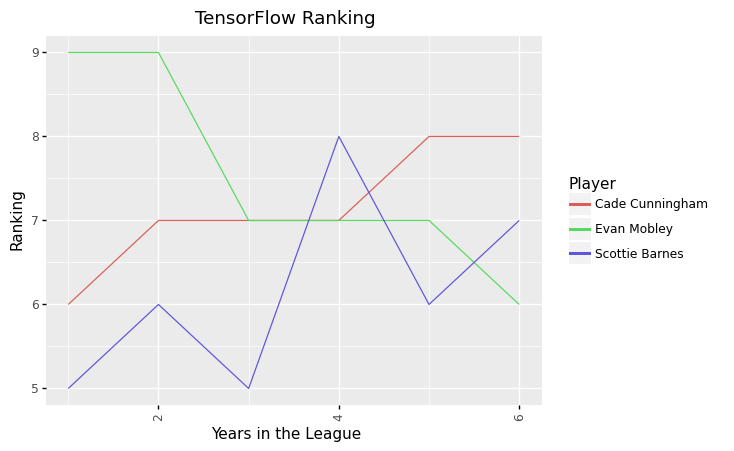

<ggplot: (150263902802)>

In [745]:
cade =["Cade Cunningham",list(df2021year6["YR 1 RANK Tensor"])[0],1]
cade2 =["Cade Cunningham",list(df2021year6["YR 2 RANK Tensor"])[0],2]
cade3 =["Cade Cunningham",list(df2021year6["YR 3 RANK Tensor"])[0],3]
cade4 =["Cade Cunningham",list(df2021year6["YR 4 RANK Tensor"])[0],4]
cade5 =["Cade Cunningham",list(df2021year6["YR 5 RANK Tensor"])[0],5]
cade6 =["Cade Cunningham",list(df2021year6["YR 6 RANK Tensor"])[0],6]
evan =["Evan Mobley",list(df2021year6["YR 1 RANK Tensor"])[2],1]
evan2 =["Evan Mobley",list(df2021year6["YR 2 RANK Tensor"])[2],2]
evan3 =["Evan Mobley",list(df2021year6["YR 3 RANK Tensor"])[2],3]
evan4 =["Evan Mobley",list(df2021year6["YR 4 RANK Tensor"])[2],4]
evan5 =["Evan Mobley",list(df2021year6["YR 5 RANK Tensor"])[2],5]
evan6 =["Evan Mobley",list(df2021year6["YR 6 RANK Tensor"])[2],6]
scottie = ["Scottie Barnes",list(df2021year6["YR 1 RANK Tensor"])[3],1]
scottie2 = ["Scottie Barnes",list(df2021year6["YR 2 RANK Tensor"])[3],2]
scottie3 = ["Scottie Barnes",list(df2021year6["YR 3 RANK Tensor"])[3],3]
scottie4 = ["Scottie Barnes",list(df2021year6["YR 4 RANK Tensor"])[3],4]
scottie5 = ["Scottie Barnes",list(df2021year6["YR 5 RANK Tensor"])[3],5]
scottie6 = ["Scottie Barnes",list(df2021year6["YR 6 RANK Tensor"])[3],6]
data1 = [cade,cade2,cade3,cade4,cade5,cade6, evan,evan2,evan3,evan4,evan5,evan6, scottie,scottie2,scottie3,scottie4,scottie5,scottie6]
dfgraph = pd.DataFrame(data1, columns = ['Player', "Rank", "Year"])
ggplot(dfgraph, aes(x="Year", y="Rank",color = "Player")) \
+ geom_line() \
+ theme(axis_text_x=element_text(rotation=90)) \
+ labs(title ="TensorFlow Ranking",
      x = "Years in the League", 
      y = "Ranking")

In [739]:
df2021yr1 = df2021yr1.rename(columns = {"PTS.1":"AVG PTS", "TRB.1":"AVG REB", "AST.1":"AVG AST"})
df2021yr1

,Player,POS,AVG PTS,AVG REB,AVG AST,CEILING PTS,CEILING REB,CEILING AST,FLOOR PTS,FLOOR REB,FLOOR AST,MP,AVG RANK
0,Cade Cunningham,G,11.083391,3.773378,2.355877,17.834039,6.545268,4.667295,6.250530,1.947226,0.259656,24.715625,6.0
1,Jalen Green,G,10.919001,2.760424,2.084951,17.569523,4.788206,4.130557,6.157822,1.424498,0.229796,24.715625,6.0
2,Evan Mobley,C,6.357441,3.894007,2.189651,8.960463,5.138829,6.936067,4.231275,2.361376,0.798309,18.154545,4.0
3,Scottie Barnes,F,7.812265,3.291509,3.906420,12.558375,5.317464,11.149731,4.428243,1.457155,2.059574,23.433333,6.0
4,Jalen Suggs,G,9.726229,3.951117,3.710245,15.650260,6.853573,7.350471,5.485152,2.038947,0.408929,24.715625,6.0
5,Josh Giddey,G,6.628287,4.966707,5.567293,10.665430,8.615206,11.029523,3.738054,2.563035,0.613606,24.715625,9.0
6,Jonathan Kuminga,F,9.060969,4.479663,1.945076,14.565693,7.236939,5.551651,5.136049,1.983153,1.025499,23.433333,6.0
7,Franz Wagner,F,7.417237,4.184473,2.236190,11.923360,6.760057,6.382550,4.204329,1.852472,1.178982,23.433333,5.0
8,Davion Mitchell,G,8.281213,1.762754,3.971336,13.325116,3.057657,7.867727,4.670229,0.909657,0.437706,24.715625,6.0
9,Ziare Williams,F,7.213914,3.364653,1.863225,11.596515,5.435630,5.318029,4.089079,1.489537,0.982344,23.433333,5.0


In [725]:
cade =["Cade Cunningham",ranklistyr1[0],1]
cade2 =["Cade Cunningham",ranklistyr2[0],2]
cade3 =["Cade Cunningham",ranklistyr3[0],3]
cade4 =["Cade Cunningham",ranklistyr4[0],4]
cade5 =["Cade Cunningham",ranklistyr5[0],5]
cade6 =["Cade Cunningham",ranklistyr6[0],6]
evan =["Evan Mobley",ranklistyr1[2],1]
evan2 =["Evan Mobley",ranklistyr2[2],2]
evan3 =["Evan Mobley",ranklistyr3[2],3]
evan4 =["Evan Mobley",ranklistyr4[2],4]
evan5 =["Evan Mobley",ranklistyr5[2],5]
evan6 =["Evan Mobley",ranklistyr6[2],6]
scottie = ["Scottie Barnes",ranklistyr1[3],1]
scottie2 = ["Scottie Barnes",ranklistyr2[3],2]
scottie3 = ["Scottie Barnes",ranklistyr3[3],3]
scottie4 = ["Scottie Barnes",ranklistyr4[3],4]
scottie5 = ["Scottie Barnes",ranklistyr5[3],5]
scottie6 = ["Scottie Barnes",ranklistyr6[3],6]
data1 = [cade,cade2,cade3,cade4,cade5,cade6, evan,evan2,evan3,evan4,evan5,evan6, scottie,scottie2,scottie3,scottie4,scottie5,scottie6]
dfgraph = pd.DataFrame(data1, columns = ['Player', "Rank", "Year"])
dfgraph

,Player,Rank,Year
0,Cade Cunningham,6.0,1
1,Cade Cunningham,8.0,2
2,Cade Cunningham,8.0,3
3,Cade Cunningham,8.0,4
4,Cade Cunningham,8.0,5
5,Cade Cunningham,8.0,6
6,Evan Mobley,4.0,1
7,Evan Mobley,7.0,2
8,Evan Mobley,7.0,3
9,Evan Mobley,7.0,4


In [730]:
date_count = dfgraph[["Rank", "Year", "Player"]].groupby("Rank", as_index=False).sum()

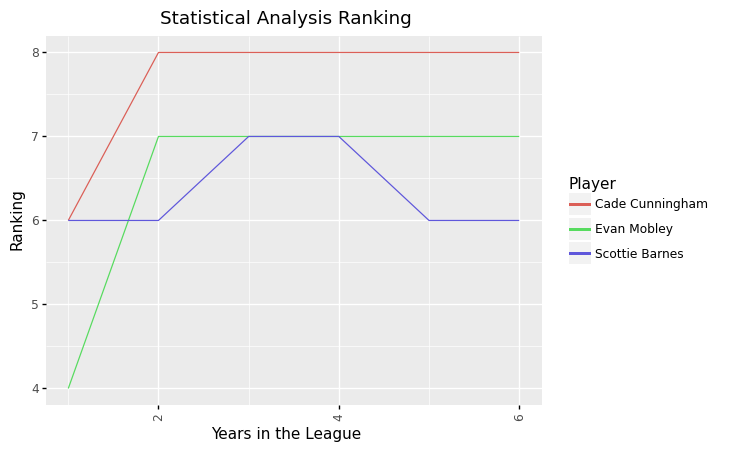

<ggplot: (150284214688)>

In [734]:
ggplot(dfgraph, aes(x="Year", y="Rank",color = "Player")) \
+ geom_line() \
+ theme(axis_text_x=element_text(rotation=90)) \
+ labs(title ="Statistical Analysis Ranking",
      x = "Years in the League", 
      y = "Ranking")

## Current 2021 Draft Class Statistics
The statistics and ranking of how the 2021 draft class are currently doing as of Novemeber 2021.

In [759]:
current2021 = pd.read_csv("playerstats/current2021.csv")

In [760]:
current2021 = current2021[["Pk","Tm","Player","Yrs","MP.1","PTS.1", "TRB.1","AST.1"]]
current2021["POS"] = list(df2021college["POS"])

In [761]:
ranklistyr1 = nbarank(0,14,current2021)
current2021["RANK"] = ranklistyr1
current2021

,Pk,Tm,Player,Yrs,MP.1,PTS.1,TRB.1,AST.1,POS,RANK
0,1,DET,Cade Cunningham,1,31.4,14.1,6.3,4.6,G,8.0
1,2,HOU,Jalen Green,1,30.8,14.0,3.1,2.3,G,7.0
2,3,CLE,Evan Mobley,1,33.8,14.1,8.1,2.6,C,8.0
3,4,TOR,Scottie Barnes,1,35.6,15.3,8.1,3.3,F,8.0
4,5,ORL,Jalen Suggs,1,27.8,12.3,3.4,3.6,G,7.0
5,6,OKC,Josh Giddey,1,29.4,10.4,7.2,5.8,G,8.0
6,7,GSW,Jonathan Kuminga,1,7.2,3.0,1.6,0.4,F,1.0
7,8,ORL,Franz Wagner,1,31.7,13.6,4.3,2.6,F,7.0
8,9,SAC,Davion Mitchell,1,25.6,9.1,2.6,3.4,G,6.0
9,10,NOP,Ziaire Williams,1,18.6,5.0,1.6,0.7,F,2.0
